In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

import tigramite
import tigramite.data_processing as pp
import tigramite.plotting as tp

from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr

from tigramite.models import LinearMediation, Models
from tigramite.causal_effects import CausalEffects

import os

import pkg_resources

import cdsapi
import random
import zipfile

import netCDF4 as nc
import xarray as xr




In [24]:
import cdsapi
import random
import zipfile

c = cdsapi.Client()
i = random.randint(-11000,100)
file = f"Download_{i}.nc"
c.retrieve(
    'projections-cmip6',
    {
        'format': 'zip',
        'temporal_resolution': 'monthly',
        'experiment': 'historical',
        'variable': 'surface_temperature',
        'model': 'cesm2_fv2',
        'year': [
            '1950', '1951', '1952',
            '1953', '1954', '1955',
            '1956', '1957', '1958',
            '1959', '1960', '1961',
            '1962', '1963', '1964',
            '1965', '1966', '1967',
            '1968', '1969', '1970',
            '1971', '1972', '1973',
            '1974', '1975', '1976',
            '1977', '1978', '1979',
            '1980', '1981', '1982',
            '1983', '1984', '1985',
            '1986', '1987', '1988',
            '1989', '1990', '1991',
            '1992', '1993', '1994',
            '1995', '1996', '1997',
            '1998', '1999', '2000',
            '2001', '2002', '2003',
            '2004', '2005', '2006',
            '2007', '2008', '2009',
            '2010', '2011', '2012',
            '2013', '2014',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'area': [
            5, 100, -5,
            150,
        ],
    },
    file)

2023-06-05 23:56:56,527 INFO Welcome to the CDS
2023-06-05 23:56:56,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cmip6
2023-06-05 23:56:56,806 INFO Request is completed
2023-06-05 23:56:56,808 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data8/adaptor.esgf_wps.retrieve-1685999996.930762-18119-15-0ba4636d-eb01-4de6-95e6-01e54ee79c94.zip to Download_-7422.nc (417.2K)
2023-06-05 23:56:57,714 INFO Download rate 461.6K/s                             


Result(content_length=427187,content_type=application/zip,location=https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data8/adaptor.esgf_wps.retrieve-1685999996.930762-18119-15-0ba4636d-eb01-4de6-95e6-01e54ee79c94.zip)

In [25]:
# Open the zip file
with zipfile.ZipFile(file, 'r') as zip_ref:
    # Extract all contents of the zip file
    zip_ref.extractall()
    print("Unzipped successfully.")


Unzipped successfully.


In [45]:
import netCDF4 as nc

# Open the NetCDF file
file_path = f"download/ts_Amon_CESM2-FV2_historical_r1i1p1f1_gn_19500115-20141215_v20191120.nc"  # Replace with the actual file path
dataset = nc.Dataset(file_path)
variable_names = dataset.variables.keys()
ding =[]
# Print the variable names
for var_name in variable_names:
    ding.append(var_name)
#     print(var_name)


variable_name = "ts"  # Replace with the actual variable name
variable = dataset.variables["ts"]

# Extract data from the variable
data = variable[:]

# Get the dimensions corresponding to the variable
dimensions = variable.dimensions


# Access variables, dimensions, and attributes
variables = dataset.variables  # Dictionary-like object with variable names as keys
dimensions = dataset.dimensions  # Dictionary-like object with dimension names as keys
global_attrs = dataset.__dict__  # Global attributes of the NetCDF file

# Example: Print the dimensions and variables in the NetCDF file
print("Dimensions:")
for dim in dimensions:
    print(dim, dimensions[dim].size)

print("\nVariables:")
for var in variables:
    print(var, variables[var].shape, variables[var].units)

# Close the NetCDF file
dataset.close()




Dimensions:
time 780
lat 6
lon 21
nbnd 2

Variables:
ts (780, 6, 21) K
lat (6,) degrees_north
lon (21,) degrees_east
time (780,) days since 0001-01-01


AttributeError: NetCDF: Attribute not found

In [35]:
import xarray as xr
import netCDF4 as nc

# Open the NetCDF file
file_path = f"download/ts_Amon_CESM2-FV2_historical_r1i1p1f1_gn_19500115-20141215_v20191120.nc" 

ds = xr.open_dataset(file_path)
ds.to_dataframe().to_csv("test.csv")

df = pd.read_csv("test.csv")

                       time       lat    lon  nbnd         ts  \
0       1950-01-15 12:00:00 -4.736842  100.0     0  302.02540   
1       1950-01-15 12:00:00 -4.736842  100.0     1  302.02540   
2       1950-01-15 12:00:00 -4.736842  102.5     0  301.76605   
3       1950-01-15 12:00:00 -4.736842  102.5     1  301.76605   
4       1950-01-15 12:00:00 -4.736842  105.0     0  299.71188   
...                     ...       ...    ...   ...        ...   
196555  2014-12-15 12:00:00  4.736842  145.0     1  301.82623   
196556  2014-12-15 12:00:00  4.736842  147.5     0  301.66605   
196557  2014-12-15 12:00:00  4.736842  147.5     1  301.66605   
196558  2014-12-15 12:00:00  4.736842  150.0     0  301.65744   
196559  2014-12-15 12:00:00  4.736842  150.0     1  301.65744   

                  time_bnds  lat_bnds  lon_bnds  
0       1950-01-01 00:00:00 -5.684211     98.75  
1       1950-02-01 00:00:00 -3.789474    101.25  
2       1950-01-01 00:00:00 -5.684211    101.25  
3       1950-02-01 

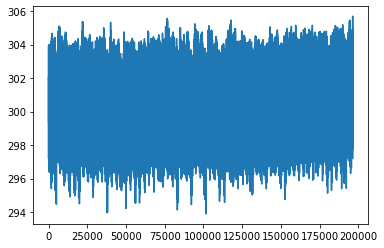

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

surface_temp = df['ts']
print(df)

plt.plot(surface_temp)

In [49]:
# Convert the 'time' column to datetime type
df['time'] = pd.to_datetime(df['time'])

# Group the DataFrame by the date and calculate the mean of 'ts' for each date
mean_ts = df.groupby(df['time'].dt.date)['ts'].mean()

# Print the mean_ts values
print(mean_ts)

time
1950-01-15    301.887138
1950-02-14    301.454177
1950-03-15    301.525562
1950-04-15    301.971047
1950-05-15    302.334318
                 ...    
2014-08-15    301.990170
2014-09-15    302.027234
2014-10-15    302.012421
2014-11-15    302.146591
2014-12-15    302.081395
Name: ts, Length: 780, dtype: float64


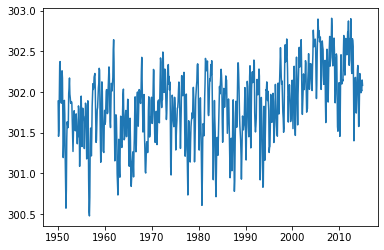

In [50]:
plt.plot(mean_ts)

In [51]:
c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'format': 'netcdf',
        'product_type': 'monthly_averaged_reanalysis',
        'variable': 'sea_surface_temperature',
        'year': [
            '1950', '1951', '1952',
            '1953', '1954', '1955',
            '1956', '1957', '1958',
            '1959', '1960', '1961',
            '1962', '1963', '1964',
            '1965', '1966', '1967',
            '1968', '1969', '1970',
            '1971', '1972', '1973',
            '1974', '1975', '1976',
            '1977', '1978', '1979',
            '1980', '1981', '1982',
            '1983', '1984', '1985',
            '1986', '1987', '1988',
            '1989', '1990', '1991',
            '1992', '1993', '1994',
            '1995', '1996', '1997',
            '1998', '1999', '2000',
            '2001', '2002', '2003',
            '2004', '2005', '2006',
            '2007', '2008', '2009',
            '2010', '2011', '2012',
            '2013', '2014', '2015',
            '2016', '2017', '2018',
            '2019', '2020', '2021',
            '2022', '2023',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            5, -170, -5,
            -120,
        ],
    },
    'download.nc')

2023-06-06 15:45:15,344 INFO Welcome to the CDS
2023-06-06 15:45:15,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-06-06 15:45:15,422 INFO Request is queued
2023-06-06 15:45:20,471 INFO Request is running
2023-06-06 15:49:34,479 INFO Request is completed
2023-06-06 15:49:34,482 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data9/adaptor.mars.internal-1686059354.3184042-5561-7-64bee64a-d99c-4dda-8890-06a6cec98e43.nc to download.nc (27.7M)
2023-06-06 15:51:37,543 ERROR Download interupted: HTTPSConnectionPool(host='download-0009-clone.copernicus-climate.eu', port=443): Read timed out.
2023-06-06 15:51:37,545 ERROR Download incomplete, downloaded 7461888 byte(s) out of 29046956
2023-06-06 15:51:37,546 WARNING Sleeping 10 seconds
2023-06-06 15:51:47,552 WARNING Resuming download at byte 7461888
2023-06-06 15:54:50,974 INFO Download rate 89.6K/s                     

Result(content_length=29046956,content_type=application/x-netcdf,location=https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data9/adaptor.mars.internal-1686059354.3184042-5561-7-64bee64a-d99c-4dda-8890-06a6cec98e43.nc)

In [59]:
# Open the NetCDF file
file_path = f"download.nc" 

ds = xr.open_dataset(file_path)
ds.to_dataframe().to_csv("reanalysis_sst_nino34.csv")

df = pd.read_csv("reanalysis_sst_nino34.csv")

print(df)

          longitude  latitude  expver        time        sst
0            -170.0       5.0       1  1950-01-01  300.40410
1            -170.0       5.0       1  1950-02-01  300.28445
2            -170.0       5.0       1  1950-03-01  300.35380
3            -170.0       5.0       1  1950-04-01  300.36765
4            -170.0       5.0       1  1950-05-01  300.13547
...             ...       ...     ...         ...        ...
14520637     -120.0      -5.0       5  2023-01-01        NaN
14520638     -120.0      -5.0       5  2023-02-01        NaN
14520639     -120.0      -5.0       5  2023-03-01        NaN
14520640     -120.0      -5.0       5  2023-04-01  301.17877
14520641     -120.0      -5.0       5  2023-05-01  301.32904

[14520642 rows x 5 columns]


In [60]:
# Convert the 'time' column to datetime type
df['time'] = pd.to_datetime(df['time'])

# Group the DataFrame by the date and calculate the mean of 'ts' for each date
mean_sst = df.groupby(df['time'].dt.date)['sst'].mean()

# Print the mean_ts values
print(mean_sst)

time
1950-01-01    298.794937
1950-02-01    298.827663
1950-03-01    299.500682
1950-04-01    299.995014
1950-05-01    300.391577
                 ...    
2023-01-01    298.980483
2023-02-01    299.376259
2023-03-01    300.354657
2023-04-01    301.083171
2023-05-01    301.529281
Name: sst, Length: 881, dtype: float64


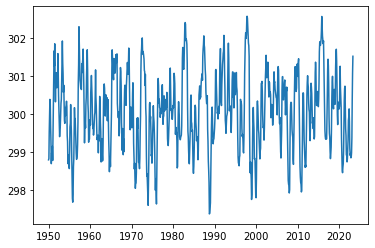

In [61]:
plt.plot(mean_sst)

In [64]:
print((len(mean_sst)-5)/12)

73.0


In [66]:
# Open the NetCDF file
file_path = f'/Users/hp/Documents/Econometrics; Climate Economics/Scriptie/Data/CDS data/MIROC6/MIROC6_zws_-180--130.nc' 
ds = xr.open_dataset(file_path)
ds.to_dataframe().to_csv("MIROC6_zws.csv")

MIROC6_zws = pd.read_csv("MIROC6_zws.csv")

In [67]:
print(MIROC6_zws)

                       time  bnds       lat        lon   time_bnds  lat_bnds  \
0       1950-01-16 12:00:00     0 -4.902687  180.00000  1950-01-01  -5.60321   
1       1950-01-16 12:00:00     0 -4.902687  181.40625  1950-01-01  -5.60321   
2       1950-01-16 12:00:00     0 -4.902687  182.81250  1950-01-01  -5.60321   
3       1950-01-16 12:00:00     0 -4.902687  184.21875  1950-01-01  -5.60321   
4       1950-01-16 12:00:00     0 -4.902687  185.62500  1950-01-01  -5.60321   
...                     ...   ...       ...        ...         ...       ...   
449275  2014-12-16 12:00:00     1  4.902687  223.59375  2015-01-01   5.60321   
449276  2014-12-16 12:00:00     1  4.902687  225.00000  2015-01-01   5.60321   
449277  2014-12-16 12:00:00     1  4.902687  226.40625  2015-01-01   5.60321   
449278  2014-12-16 12:00:00     1  4.902687  227.81250  2015-01-01   5.60321   
449279  2014-12-16 12:00:00     1  4.902687  229.21875  2015-01-01   5.60321   

          lon_bnds  height       uas  


In [112]:
# Convert the 'time' column to datetime type
MIROC6_zws['time'] = pd.to_datetime(MIROC6_zws['time'])

# Group the DataFrame by the date and calculate the mean of 'ts' for each date
mean_MIROC6_zws = MIROC6_zws.groupby(MIROC6_zws['time'].dt.date)['uas'].mean()

# Print the mean_ts values
print(mean_MIROC6_zws)

time
1950-01-16   -7.353836
1950-02-15   -5.501358
1950-03-16   -5.781377
1950-04-16   -4.964899
1950-05-16   -5.470660
                ...   
2014-08-16   -6.961205
2014-09-16   -6.821036
2014-10-16   -5.442751
2014-11-16   -7.100113
2014-12-16   -6.853096
Name: uas, Length: 780, dtype: float64


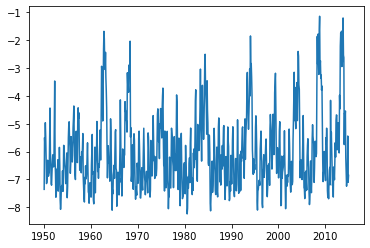

In [91]:
plt.plot(mean_MIROC6_zws)

                 uas
time                
1950-01-16 -7.353836
1950-02-15 -5.501358
1950-03-16 -5.781377
1950-04-16 -4.964899
1950-05-16 -5.470660
...              ...
2014-08-16 -6.961205
2014-09-16 -6.821036
2014-10-16 -5.442751
2014-11-16 -7.100113
2014-12-16 -6.853096

[780 rows x 1 columns]


In [95]:
# Open the NetCDF file
file_path = f'/Users/hp/Documents/Econometrics; Climate Economics/Scriptie/Data/CDS data/MIROC6/MIROC6_slp_130-150.nc' 
ds = xr.open_dataset(file_path)
ds.to_dataframe().to_csv("MIROC6_WPAC.csv")

MIROC6_WPAC = pd.read_csv("MIROC6_WPAC.csv")

print(MIROC6_WPAC)


                       time  bnds       lat        lon   time_bnds  lat_bnds  \
0       1950-01-16 12:00:00     0 -4.902687  130.78125  1950-01-01  -5.60321   
1       1950-01-16 12:00:00     0 -4.902687  132.18750  1950-01-01  -5.60321   
2       1950-01-16 12:00:00     0 -4.902687  133.59375  1950-01-01  -5.60321   
3       1950-01-16 12:00:00     0 -4.902687  135.00000  1950-01-01  -5.60321   
4       1950-01-16 12:00:00     0 -4.902687  136.40625  1950-01-01  -5.60321   
...                     ...   ...       ...        ...         ...       ...   
174715  2014-12-16 12:00:00     1  4.902687  143.43750  2015-01-01   5.60321   
174716  2014-12-16 12:00:00     1  4.902687  144.84375  2015-01-01   5.60321   
174717  2014-12-16 12:00:00     1  4.902687  146.25000  2015-01-01   5.60321   
174718  2014-12-16 12:00:00     1  4.902687  147.65625  2015-01-01   5.60321   
174719  2014-12-16 12:00:00     1  4.902687  149.06250  2015-01-01   5.60321   

          lon_bnds         psl  
0     

In [96]:
# Convert the 'time' column to datetime type
MIROC6_WPAC['time'] = pd.to_datetime(MIROC6_WPAC['time'])

# Group the DataFrame by the date and calculate the mean of 'ts' for each date
mean_MIROC6_WPAC = MIROC6_WPAC.groupby(MIROC6_WPAC['time'].dt.date)['psl'].mean()

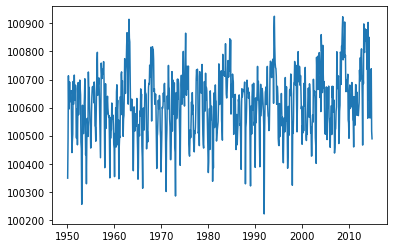

In [97]:
plt.plot(mean_MIROC6_WPAC)

In [98]:
# Open the NetCDF file
file_path = f'/Users/hp/Documents/Econometrics; Climate Economics/Scriptie/Data/CDS data/MIROC6/MIROC6_t_-150--130.nc' 
ds = xr.open_dataset(file_path)
ds.to_dataframe().to_csv("MIROC6_CPAC.csv")

MIROC6_CPAC = pd.read_csv("MIROC6_CPAC.csv")

print(MIROC6_CPAC)

                       time  bnds       lat        lon   time_bnds  lat_bnds  \
0       1950-01-16 12:00:00     0 -4.902687  210.93750  1950-01-01  -5.60321   
1       1950-01-16 12:00:00     0 -4.902687  212.34375  1950-01-01  -5.60321   
2       1950-01-16 12:00:00     0 -4.902687  213.75000  1950-01-01  -5.60321   
3       1950-01-16 12:00:00     0 -4.902687  215.15625  1950-01-01  -5.60321   
4       1950-01-16 12:00:00     0 -4.902687  216.56250  1950-01-01  -5.60321   
...                     ...   ...       ...        ...         ...       ...   
174715  2014-12-16 12:00:00     1  4.902687  223.59375  2015-01-01   5.60321   
174716  2014-12-16 12:00:00     1  4.902687  225.00000  2015-01-01   5.60321   
174717  2014-12-16 12:00:00     1  4.902687  226.40625  2015-01-01   5.60321   
174718  2014-12-16 12:00:00     1  4.902687  227.81250  2015-01-01   5.60321   
174719  2014-12-16 12:00:00     1  4.902687  229.21875  2015-01-01   5.60321   

          lon_bnds  height        tas  

In [99]:
# Convert the 'time' column to datetime type
MIROC6_CPAC['time'] = pd.to_datetime(MIROC6_CPAC['time'])

# Group the DataFrame by the date and calculate the mean of 'ts' for each date
mean_MIROC6_CPAC = MIROC6_CPAC.groupby(MIROC6_CPAC['time'].dt.date)['tas'].mean()

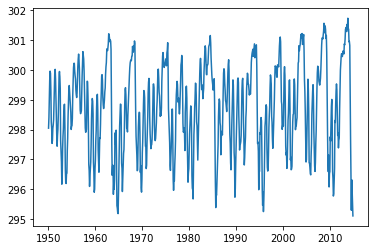

In [100]:
plt.plot(mean_MIROC6_CPAC)

In [101]:
# Open the NetCDF file
file_path = f'/Users/hp/Documents/Econometrics; Climate Economics/Scriptie/Data/CDS data/MIROC6/MIROC6_t--100--80.nc' 
ds = xr.open_dataset(file_path)
ds.to_dataframe().to_csv("MIROC6_EPAC.csv")

MIROC6_EPAC = pd.read_csv("MIROC6_EPAC.csv")

print(MIROC6_EPAC)

                       time  bnds       lat        lon   time_bnds  lat_bnds  \
0       1950-01-16 12:00:00     0 -4.902687  260.15625  1950-01-01  -5.60321   
1       1950-01-16 12:00:00     0 -4.902687  261.56250  1950-01-01  -5.60321   
2       1950-01-16 12:00:00     0 -4.902687  262.96875  1950-01-01  -5.60321   
3       1950-01-16 12:00:00     0 -4.902687  264.37500  1950-01-01  -5.60321   
4       1950-01-16 12:00:00     0 -4.902687  265.78125  1950-01-01  -5.60321   
...                     ...   ...       ...        ...         ...       ...   
187195  2014-12-16 12:00:00     1  4.902687  274.21875  2015-01-01   5.60321   
187196  2014-12-16 12:00:00     1  4.902687  275.62500  2015-01-01   5.60321   
187197  2014-12-16 12:00:00     1  4.902687  277.03125  2015-01-01   5.60321   
187198  2014-12-16 12:00:00     1  4.902687  278.43750  2015-01-01   5.60321   
187199  2014-12-16 12:00:00     1  4.902687  279.84375  2015-01-01   5.60321   

          lon_bnds  height        tas  

In [102]:
# Convert the 'time' column to datetime type
MIROC6_EPAC['time'] = pd.to_datetime(MIROC6_EPAC['time'])

# Group the DataFrame by the date and calculate the mean of 'ts' for each date
mean_MIROC6_EPAC = MIROC6_EPAC.groupby(MIROC6_EPAC['time'].dt.date)['tas'].mean()

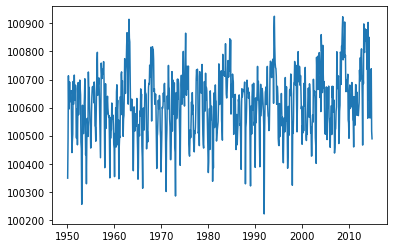

In [103]:
plt.plot(mean_MIROC6_WPAC)

In [105]:
print(mean_MIROC6_WPAC[:])

time
1950-01-16    100348.381893
1950-02-15    100489.137473
1950-03-16    100713.413232
1950-04-16    100594.365402
1950-05-16    100628.577902
                  ...      
2014-08-16    100677.498196
2014-09-16    100694.863402
2014-10-16    100738.412063
2014-11-16    100516.118893
2014-12-16    100488.632616
Name: psl, Length: 780, dtype: float64


In [116]:
zws_MIROC6 = []
for i in range(len(mean_MIROC6_zws)):
    zws_MIROC6.append(mean_MIROC6_zws[i])
print(len(zws_MIROC6))

WPAC_MIROC6 = []
for i in range(len(mean_MIROC6_WPAC)):
    WPAC_MIROC6.append(mean_MIROC6_WPAC[i])
print(len(WPAC_MIROC6))
    
CPAC_MIROC6 = []
for i in range(len(mean_MIROC6_CPAC)):
    CPAC_MIROC6.append(mean_MIROC6_CPAC[i])
print(len(CPAC_MIROC6))

EPAC_MIROC6 = []
for i in range(len(mean_MIROC6_EPAC)):
    EPAC_MIROC6.append(mean_MIROC6_EPAC[i])
print(len(EPAC_MIROC6))
    


780
780
780
780


In [117]:
extendedmiroc6_data = np.vstack((WPAC_MIROC6, CPAC_MIROC6, EPAC_MIROC6, zws_MIROC6,)).T

In [118]:
print(extendedmiroc6_data)

[[ 1.00348382e+05  2.98048121e+02  2.98910386e+02 -7.35383613e+00]
 [ 1.00489137e+05  2.98410155e+02  2.99709437e+02 -5.50135826e+00]
 [ 1.00713413e+05  2.98966475e+02  2.99896208e+02 -5.78137728e+00]
 ...
 [ 1.00738412e+05  2.95977317e+02  2.97309036e+02 -5.44275125e+00]
 [ 1.00516119e+05  2.95497992e+02  2.97724429e+02 -7.10011320e+00]
 [ 1.00488633e+05  2.95104497e+02  2.97909005e+02 -6.85309644e+00]]


In [127]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

import tigramite
import tigramite.data_processing as pp
import tigramite.plotting as tp

from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr

from tigramite.models import LinearMediation, Models
from tigramite.causal_effects import CausalEffects

import os

import pkg_resources

# function to detrend + deseazonalize data
def deTrend_deSeasonalize(data, show_plot = True):
    # step 1: seasonal component
    decomposition = seasonal_decompose(data, model='additive', period=12)
    data = data - decomposition.seasonal
    # step 2: Trend based on Gaussian kernel smoother
    smoothed = pp.smooth(np.copy(data), smooth_width=15 * 12, residuals=False)
    index = range(0, len(data))

    if show_plot == True:
        plt.plot(index, data)
        plt.plot(index,smoothed)
        plt.legend(['data', 'Smoothed trend'])
        plt.title("Deseasonalized data with smoothed trend")
        plt.show()

    else:
        result = data - smoothed
        return result
    
# function to detrend data
def deTrend(data):
    # Trend based on Gaussian kernel smoother
    smoothed = pp.smooth(np.copy(data), smooth_width=30 * 12, residuals=True)
    return smoothed

# function that makes El nino, La nina mask
# input data from correct years + 1 from the climate explorer
# set to False if we do NOT want to mask this value

def mask_maker(df_sstnino34):
    nino34list = df_sstnino34[:,1:].reshape(-1)

    nino34list = deTrend(nino34list)
    nino34list_by_year = nino34list.reshape(-1,12)

    # NINO MASK
    
    ninamask = np.ones(len(nino34list)).reshape(-1,12)
    ninomask = np.ones(len(nino34list)).reshape(-1,12)
    neutralmask = np.ones(len(nino34list)).reshape(-1,12)

    for i in range(len(nino34list_by_year)-1):
        if (nino34list_by_year[i,10] + nino34list_by_year[i,11] + nino34list_by_year[i+1,0])/3 > 0.5:
            ninomask[i,1:] = False
            ninomask[i+1,0] = False
    ninomask = ninomask[:len(ninomask),:].reshape(-1)
    ninomask = ninomask[:-12]
    
    for i in range(len(nino34list_by_year)-1):
        if (nino34list_by_year[i,10] + nino34list_by_year[i,11] + nino34list_by_year[i+1,0])/3 < -0.5:
            ninamask[i,1:] = False
            ninamask[i+1,0] = False
    ninamask = ninamask[:len(ninamask),:].reshape(-1)
    ninamask = ninamask[:-12]
    
    for i in range(len(nino34list_by_year)-1):
        if -0.5 < (nino34list_by_year[i,10] + nino34list_by_year[i,11] + nino34list_by_year[i+1,0])/3 < 0.5:
            neutralmask[i,1:] = False
            neutralmask[i+1,0] = False
    #neutralmask = neutralmask[:len(neutralmask)-1,:].reshape(-1)
    neutralmask = neutralmask[:len(neutralmask),:].reshape(-1)  
    neutralmask = neutralmask[:-12]
    
    return ninomask, ninamask, neutralmask


def compute_f1_score(pcmci_result_referencemodel, pcmci_result_othermodel, threshold):
    reference = np.where(pcmci_result_referencemodel['p_matrix'].round(3) < threshold, 1, 0)
    other = np.where(pcmci_result_othermodel['p_matrix'].round(3) < threshold, 1, 0)
    other_flat = other.flatten()
    reference_flat = reference.flatten()
    f1 = f1_score(reference_flat, other_flat)
    return f1

def count_enso(mask,year):
    count = 0
    for i in range(len(mask)-year*12, len(mask), 12):
        if mask[i+3] == 0:
            count+=1
            
    return count

# define parcorr
parcorr = ParCorr(significance='analytic', mask_type='y')

def firsthalf_lasthalf(GFDL_data, parcorr, extended = False):
    
    if extended == True:
        # Variable names used throughout
        var_names = ['WPAC', 'CPAC', 'EPAC', 'ZWS']

        # make data frame of data
        df_GFDL = pd.DataFrame(GFDL_data, columns=var_names)
        dataframe_GFDL = pp.DataFrame(GFDL_data, 
                                 datatime = np.arange(len(GFDL_data)), 
                                 var_names=var_names)

        cpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['CPAC'], show_plot = False)
        epac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['EPAC'], show_plot = False)
        wpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['WPAC'], show_plot = False)
        zws_detrend = deTrend_deSeasonalize(df_GFDL['ZWS'], show_plot = False)
        
        #df_GFDL_processed = pd.DataFrame({'WPAC': wpac_detrend_GFDL, 
        #                                'CPAC': cpac_detrend_GFDL, 
        #                                'EPAC': epac_detrend_GFDL,
        #                                'ZWS': zws_detrend,
        #                                'NHF': nhf_detrend})
        df_GFDL_processed = pd.DataFrame({'WPAC': wpac_detrend_GFDL, 
                                        'CPAC': cpac_detrend_GFDL, 
                                        'EPAC': epac_detrend_GFDL,
                                        'ZWS': zws_detrend})
    
    else:
        # Variable names used throughout
        var_names = ['WPAC', 'CPAC', 'EPAC']

        # make data frame of data
        df_GFDL = pd.DataFrame(GFDL_data, columns=var_names)
        dataframe_GFDL = pp.DataFrame(GFDL_data, 
                                 datatime = np.arange(len(GFDL_data)), 
                                 var_names=var_names)

        cpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['CPAC'], show_plot = False)
        epac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['EPAC'], show_plot = False)
        wpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['WPAC'], show_plot = False)

        df_GFDL_processed = pd.DataFrame({'WPAC': wpac_detrend_GFDL, 'CPAC': cpac_detrend_GFDL, 'EPAC': epac_detrend_GFDL})
    
    half = int(len(df_GFDL_processed)/2)
    df_firsthalf = df_GFDL_processed[:half]
    df_secondhalf = df_GFDL_processed[half:]

    
    # Construct mask for spring barrier
    cycle_length = 12
    springbarrier_mask = np.ones(df_GFDL_processed.shape, dtype=bool)
    for i in [4, 5, 6, 7, 8, 9, 10, 11, 0]:
        springbarrier_mask[i::cycle_length, :] = False
    
    dataframe_GFDL = pp.DataFrame(np.copy(df_firsthalf), datatime = {0:np.arange(len(df_firsthalf))}, var_names= var_names, mask = springbarrier_mask[:half,:])
    pcmci_GFDL = PCMCI(dataframe=dataframe_GFDL, cond_ind_test=parcorr,verbosity=0)
    results_springbarrier_firsthalf = pcmci_GFDL.run_pcmci(tau_max=3, tau_min=1, pc_alpha=0.05, alpha_level=0.05, fdr_method = 'fdr_bh')
    
    dataframe_GFDL = pp.DataFrame(np.copy(df_secondhalf), datatime = {0:np.arange(len(df_secondhalf))}, var_names= var_names, mask = springbarrier_mask[half:,:])
    pcmci_GFDL = PCMCI(dataframe=dataframe_GFDL, cond_ind_test=parcorr,verbosity=0)
    results_springbarrier_secondhalf = pcmci_GFDL.run_pcmci(tau_max=3, tau_min=1, pc_alpha=0.05, alpha_level=0.05, fdr_method = 'fdr_bh')
    

    ## PLOT ALL DAGS
    
    fig, axes = plt.subplots(1,2,figsize=(8, 4), tight_layout=True)

    tp.plot_graph(
        val_matrix=results_springbarrier_firsthalf['val_matrix'],
        graph=results_springbarrier_firsthalf['graph'],
        var_names=var_names,
        link_colorbar_label='cross-MCI',
        node_colorbar_label='auto-MCI',
        fig_ax= (fig, axes[0,0]))
    axes[0,0].set_title('Causal networks based on MIROC6 extended model data 1950-1982')

    plt.show()

    
    ## PLOT ALL DAGS
    
    fig, ax = plt.subplots(figsize=(4, 4), tight_layout=True)

    tp.plot_graph(
        val_matrix=results_springbarrier_secondhalf['val_matrix'],
        graph=results_springbarrier_secondhalf['graph'],
        var_names=var_names,
        link_colorbar_label='cross-MCI',
        node_colorbar_label='auto-MCI',
        fig_ax= (fig, ax))
    ax.set_title('Causal networks based on MIROC6 extended model data 1983-2014')

    plt.show()

   

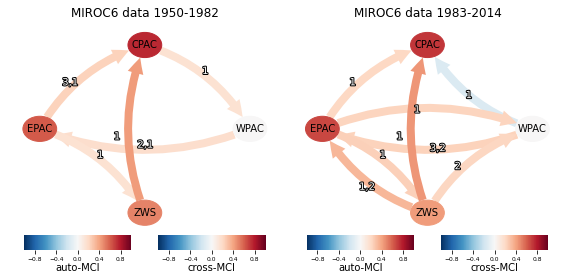

(array([[[1.00000000e+00, 8.26490524e-02, 5.76988285e-01, 7.03769160e-01],
         [1.00000000e+00, 8.98759518e-01, 4.15156835e-01, 8.98759518e-01],
         [1.00000000e+00, 4.74517548e-02, 1.72659319e-02, 4.15156835e-01],
         [1.00000000e+00, 8.98759518e-01, 5.13692286e-01, 6.08591489e-01]],
 
        [[1.00000000e+00, 4.74517548e-02, 8.98759518e-01, 9.03968565e-01],
         [1.00000000e+00, 1.29754476e-51, 5.77511123e-01, 8.75269469e-01],
         [1.00000000e+00, 6.64704095e-01, 8.98759518e-01, 7.69082358e-01],
         [1.00000000e+00, 8.23585982e-01, 6.80787590e-01, 4.15156835e-01]],
 
        [[1.00000000e+00, 6.04969252e-01, 4.35557490e-01, 6.64704095e-01],
         [1.00000000e+00, 4.74517548e-02, 2.12770618e-01, 7.80126472e-04],
         [1.00000000e+00, 1.02470890e-28, 6.08591489e-01, 7.69603577e-01],
         [1.00000000e+00, 4.74517548e-02, 4.15156835e-01, 6.72218934e-01]],
 
        [[1.00000000e+00, 9.03968565e-01, 9.40999221e-02, 5.13692286e-01],
         [1.0000

In [237]:
firsthalf_lasthalf(extendedmiroc6_data, parcorr, 'MIROC6', extended = True)

# TWO ZONAL WIND STRESSES

In [210]:
# Open the NetCDF file
file_path = f'/Users/hp/Documents/Econometrics; Climate Economics/Scriptie/Data/CDS data/MIROC6/MIROC6_ZWSW.nc' 
ds = xr.open_dataset(file_path)
ds.to_dataframe().to_csv("MIROC6_ZWSW.csv")

MIROC6_ZWSW = pd.read_csv("MIROC6_ZWSW.csv")

print(MIROC6_ZWSW)

                       time  bnds       lat        lon   time_bnds  lat_bnds  \
0       1950-01-16 12:00:00     0 -4.902687  150.46875  1950-01-01  -5.60321   
1       1950-01-16 12:00:00     0 -4.902687  151.87500  1950-01-01  -5.60321   
2       1950-01-16 12:00:00     0 -4.902687  153.28125  1950-01-01  -5.60321   
3       1950-01-16 12:00:00     0 -4.902687  154.68750  1950-01-01  -5.60321   
4       1950-01-16 12:00:00     0 -4.902687  156.09375  1950-01-01  -5.60321   
...                     ...   ...       ...        ...         ...       ...   
274555  2014-12-16 12:00:00     1  4.902687  174.37500  2015-01-01   5.60321   
274556  2014-12-16 12:00:00     1  4.902687  175.78125  2015-01-01   5.60321   
274557  2014-12-16 12:00:00     1  4.902687  177.18750  2015-01-01   5.60321   
274558  2014-12-16 12:00:00     1  4.902687  178.59375  2015-01-01   5.60321   
274559  2014-12-16 12:00:00     1  4.902687  180.00000  2015-01-01   5.60321   

          lon_bnds  height       uas  


In [211]:
# Convert the 'time' column to datetime type
MIROC6_ZWSW['time'] = pd.to_datetime(MIROC6_ZWSW['time'])

# Group the DataFrame by the date and calculate the mean of 'ts' for each date
mean_MIROC6_ZWSW = MIROC6_ZWSW.groupby(MIROC6_ZWSW['time'].dt.date)['uas'].mean()

ZWSW_MIROC6 = []
for i in range(len(mean_MIROC6_ZWSW)):
    ZWSW_MIROC6.append(mean_MIROC6_ZWSW[i])
print(len(ZWSW_MIROC6))


780


In [212]:
# Open the NetCDF file
file_path = f'/Users/hp/Documents/Econometrics; Climate Economics/Scriptie/Data/CDS data/MIROC6/MIROC6_ZWSE.nc' 
ds = xr.open_dataset(file_path)
ds.to_dataframe().to_csv("MIROC6_ZWSE.csv")



In [213]:
# Convert the 'time' column to datetime type
MIROC6_ZWSE['time'] = pd.to_datetime(MIROC6_ZWSE['time'])

# Group the DataFrame by the date and calculate the mean of 'ts' for each date
mean_MIROC6_ZWSE = MIROC6_ZWSE.groupby(MIROC6_ZWSE['time'].dt.date)['uas'].mean()

ZWSE_MIROC6 = []
for i in range(len(mean_MIROC6_ZWSE)):
    ZWSE_MIROC6.append(mean_MIROC6_ZWSE[i])
print(len(ZWSE_MIROC6))

780


In [214]:
ZWS_MIROC6_data = np.vstack((WPAC_MIROC6, CPAC_MIROC6, EPAC_MIROC6, ZWSW_MIROC6, ZWSE_MIROC6,)).T


In [296]:
def firsthalf_lasthalf(GFDL_data, parcorr, model, extended = 0):
    
    if extended == 2:
        # Variable names used throughout
        var_names = ['WPAC', 'CPAC', 'EPAC', 'ZWS', 'HF']

        # make data frame of data
        df_GFDL = pd.DataFrame(GFDL_data, columns=var_names)
        dataframe_GFDL = pp.DataFrame(GFDL_data, 
                                 datatime = np.arange(len(GFDL_data)), 
                                 var_names=var_names)

        cpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['CPAC'], show_plot = False)
        epac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['EPAC'], show_plot = False)
        wpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['WPAC'], show_plot = False)
        zws_detrend = deTrend_deSeasonalize(df_GFDL['ZWS'], show_plot = False)
        hf_detrend = deTrend_deSeasonalize(df_GFDL['HF'], show_plot = False)
        
        #df_GFDL_processed = pd.DataFrame({'WPAC': wpac_detrend_GFDL, 
        #                                'CPAC': cpac_detrend_GFDL, 
        #                                'EPAC': epac_detrend_GFDL,
        #                                'ZWS': zws_detrend,
        #                                'NHF': nhf_detrend})
        df_GFDL_processed = pd.DataFrame({'WPAC': wpac_detrend_GFDL, 
                                        'CPAC': cpac_detrend_GFDL, 
                                        'EPAC': epac_detrend_GFDL,
                                        'ZWS': zws_detrend, 
                                         'HF': hf_detrend})
    
    
    elif extended == 1:
        # Variable names used throughout
        var_names = ['WPAC', 'CPAC', 'EPAC', 'ZWS']
        
        GFDL_data = GFDL_data[:,:4]

        # make data frame of data
        df_GFDL = pd.DataFrame(GFDL_data, columns=var_names)
        dataframe_GFDL = pp.DataFrame(GFDL_data, 
                                 datatime = np.arange(len(GFDL_data)), 
                                 var_names=var_names)

        cpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['CPAC'], show_plot = False)
        epac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['EPAC'], show_plot = False)
        wpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['WPAC'], show_plot = False)
        zws_detrend = deTrend_deSeasonalize(df_GFDL['ZWS'], show_plot = False)

        
        #df_GFDL_processed = pd.DataFrame({'WPAC': wpac_detrend_GFDL, 
        #                                'CPAC': cpac_detrend_GFDL, 
        #                                'EPAC': epac_detrend_GFDL,
        #                                'ZWS': zws_detrend,
        #                                'NHF': nhf_detrend})
        df_GFDL_processed = pd.DataFrame({'WPAC': wpac_detrend_GFDL, 
                                        'CPAC': cpac_detrend_GFDL, 
                                        'EPAC': epac_detrend_GFDL,
                                        'ZWS': zws_detrend})
    
    elif extended == 0:
        # Variable names used throughout
        var_names = ['WPAC', 'CPAC', 'EPAC']
        
        GFDL_data = GFDL_data[:,:3]

        # make data frame of data
        df_GFDL = pd.DataFrame(GFDL_data, columns=var_names)
        dataframe_GFDL = pp.DataFrame(GFDL_data, 
                                 datatime = np.arange(len(GFDL_data)), 
                                 var_names=var_names)

        cpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['CPAC'], show_plot = False)
        epac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['EPAC'], show_plot = False)
        wpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['WPAC'], show_plot = False)

        df_GFDL_processed = pd.DataFrame({'WPAC': wpac_detrend_GFDL, 'CPAC': cpac_detrend_GFDL, 'EPAC': epac_detrend_GFDL})
    
    half = int(len(df_GFDL_processed)/2)
    df_firsthalf = df_GFDL_processed[:half]
    df_secondhalf = df_GFDL_processed[half:]
    
    # Construct mask for spring barrier
    cycle_length = 12
    springbarrier_mask = np.ones(df_GFDL_processed.shape, dtype=bool)
    for i in [4, 5, 6, 7, 8, 9, 10, 11, 0]:
        springbarrier_mask[i::cycle_length, :] = False
    
    dataframe_GFDL = pp.DataFrame(np.copy(df_firsthalf), datatime = {0:np.arange(len(df_firsthalf))}, var_names= var_names, mask = springbarrier_mask[:half,:])
    pcmci_GFDL = PCMCI(dataframe=dataframe_GFDL, cond_ind_test=parcorr,verbosity=0)
    results_springbarrier_firsthalf = pcmci_GFDL.run_pcmci(tau_max=3, tau_min=1, pc_alpha=0.05, alpha_level=0.05, fdr_method = 'fdr_bh')
    
    dataframe_GFDL = pp.DataFrame(np.copy(df_secondhalf), datatime = {0:np.arange(len(df_secondhalf))}, var_names= var_names, mask = springbarrier_mask[half:,:])
    pcmci_GFDL = PCMCI(dataframe=dataframe_GFDL, cond_ind_test=parcorr,verbosity=0)
    results_springbarrier_secondhalf = pcmci_GFDL.run_pcmci(tau_max=3, tau_min=1, pc_alpha=0.05, alpha_level=0.05, fdr_method = 'fdr_bh')
    
    dataframe_GFDL = pp.DataFrame(np.copy(df_GFDL_processed), datatime = {0:np.arange(len(df_GFDL_processed))}, var_names= var_names, mask = springbarrier_mask)
    pcmci_GFDL = PCMCI(dataframe=dataframe_GFDL, cond_ind_test=parcorr,verbosity=0)
    results_springbarrier_alldata = pcmci_GFDL.run_pcmci(tau_max=3, tau_min=1, pc_alpha=0.05, alpha_level=0.05, fdr_method = 'fdr_bh')
    
    fig, ax = plt.subplots(figsize =(4,4), tight_layout=True)
    tp.plot_graph(
        val_matrix=results_springbarrier_alldata['val_matrix'],
        graph=results_springbarrier_alldata['graph'],
        var_names=var_names,
        link_colorbar_label='cross-MCI',
        node_colorbar_label='auto-MCI',
        fig_ax= (fig, ax))
    ax.set_title(f'{model} all data')
    
    plt.show()
    
    ## PLOT ALL DAGS
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True)

    tp.plot_graph(
        val_matrix=results_springbarrier_firsthalf['val_matrix'],
        graph=results_springbarrier_firsthalf['graph'],
        var_names=var_names,
        link_colorbar_label='cross-MCI',
        node_colorbar_label='auto-MCI',
        fig_ax= (fig, axes[0]))
    axes[0].set_title(f'{model} data 1950-1982')

    tp.plot_graph(
        val_matrix=results_springbarrier_secondhalf['val_matrix'],
        graph=results_springbarrier_secondhalf['graph'],
        var_names=var_names,
        link_colorbar_label='cross-MCI',
        node_colorbar_label='auto-MCI',
        fig_ax= (fig, axes[1]))
    axes[1].set_title(f'{model} data 1983-2014')

    plt.show()
    
    return results_springbarrier_firsthalf['p_matrix'], results_springbarrier_secondhalf
   

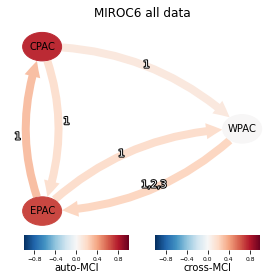

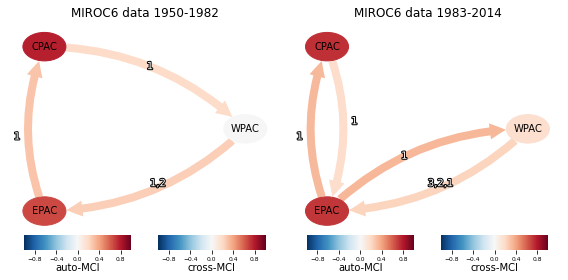

In [297]:
miroc1, miroc2 = firsthalf_lasthalf(ZWS_MIROC6_data, parcorr, 'MIROC6', extended = 0)

In [152]:
%cd /Users/hp/Documents/Econometrics; Climate Economics/Scriptie/Data

/Users/hp/Documents/Econometrics; Climate Economics/Scriptie/Data


In [2]:
def ncfiles_to_series(nc_file_name, csv_file_name, var_name, model_map):
# Open the NetCDF file
    file_path = f'CDS data/{model_map}/' + nc_file_name
    ds = xr.open_dataset(file_path)
    ds.to_dataframe().to_csv('CDS data/csv_data/' + csv_file_name)
    var = pd.read_csv('CDS data/csv_data/' + csv_file_name)
    # Convert the 'time' column to datetime type
    var['time'] = pd.to_datetime(var['time'])
    # Group the DataFrame by the date and calculate the mean of 'ts' for each date
    var = var.groupby(var['time'].dt.date)[var_name].mean()
    array = []
    for i in range(len(var)):
        array.append(var[i])
    return array

#ncfiles_to_series('tas_Amon_EC-Earth3-CC_historical_r1i1p1f1_gr_19500116-20141216_v20210113.nc',
#                  "tas_EC-Earth3-CC_historical.csv", 'tas', time_period = "Past")

CESM2_nc_names = ['psl_Amon_CESM2_historical_r1i1p1f1_gn_19500115-20141215_v20190308.nc',
             'tas_Amon_CESM2_historical_r1i1p1f1_gn_19500115-20141215_v20190308.nc',
             'Etas_Amon_CESM2_historical_r1i1p1f1_gn_19500115-20141215_v20190308.nc',
             'ua_Amon_CESM2_historical_r1i1p1f1_gn_19500115-20141215_v20190308.nc',
             'hfls_Amon_CESM2_historical_r1i1p1f1_gn_19500115-20141215_v20190308.nc',
             'hfss_Amon_CESM2_historical_r1i1p1f1_gn_19500115-20141215_v20190308.nc']

CESM2_csv_names = ['mean_WPAC_CESM2',
                   'mean_CPAC_CESM2',
                   'mean_EPAC_CESM2',
                   'mean_ZWS_CESM2',
                   'mean_LHF_CESM2',
                   'mean_SHF_CESM2'
                  ]

CESM2_var_names = ['psl',
            'tas',
            'tas',
            'ua',
            'hfls',
            'hfss']

CESM2_data = []

for i in range(len(CESM2_nc_names)):
    data = ncfiles_to_series(CESM2_nc_names[i], CESM2_csv_names[i], CESM2_var_names[i], 'CESM2')
    CESM2_data.append(data)
    


NameError: name 'xr' is not defined

In [170]:
print(len(CESM2_data[0]))
print(len(CESM2_data[1]))
print(len(CESM2_data[2]))
print(len(CESM2_data[3]))
print(len(CESM2_data[4]))
print(len(CESM2_data[5]))

CESM2_data_complete = CESM2_data
last_two_arrays = CESM2_data_complete[-2:]  # Extract the last two arrays
mean_array = np.mean(last_two_arrays, axis=0)  # Calculate the mean along the first axis
CESM2_data_complete[3]*=-1
CESM2_data_complete = CESM2_data_complete[:-2]  # Remove the last two arrays from your original array
CESM2_data_complete = np.append(CESM2_data_complete, [mean_array], axis=0)  # Add the mean array to your updated array





780
780
780
0
780
780


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [172]:

file_path = f'/Users/hp/Documents/Econometrics; Climate Economics/Scriptie/Data/CDS data/CESM2/ua_Amon_CESM2_historical_r1i1p1f1_gn_19500115-20141215_v20190308.nc' 
ds = xr.open_dataset(file_path)
ds.to_dataframe().to_csv("testje.csv")

testje = pd.read_csv("testje.csv")

print(np.isnan(testje['ua']).sum())

28748


In [281]:
GFDL_nc_names = ['psl_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_19500116-20141216_v20190726.nc',
             'tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_19500116-20141216_v20190726.nc',
             'Etas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_19500116-20141216_v20190726.nc',
             'uas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_19500116-20141216_v20190726.nc',
             'hfls_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_19500116-20141216_v20190726.nc',
             'hfss_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_19500116-20141216_v20190726.nc']

GFDL_csv_names = ['mean_WPAC_CESM2',
                   'mean_CPAC_CESM2',
                   'mean_EPAC_CESM2',
                   'mean_ZWS_CESM2',
                   'mean_LHF_CESM2',
                   'mean_SHF_CESM2'
                  ]

GFDL_var_names = ['psl',
            'tas',
            'tas',
            'uas',
            'hfls',
            'hfss']

GFDL_data = []

for i in range(len(GFDL_nc_names)):
    if i ==0:
        GFDL = ncfiles_to_series(GFDL_nc_names[i], GFDL_csv_names[i], GFDL_var_names[i], 'GFDL')
    else:
        more_GFDL = ncfiles_to_series(GFDL_nc_names[i], GFDL_csv_names[i], GFDL_var_names[i], 'GFDL')
        GFDL = np.vstack((GFDL, more_GFDL))
        
    
    

In [282]:
GFDL_data = GFDL
last_two_mean = np.mean(GFDL_data[-2:, :], axis=0)
GFDL_data = GFDL[:-2, :]
GFDL_data[3, :] *= -1

GFDL_data_final = np.vstack((GFDL_data, last_two_mean))
GFDL_data_final = GFDL_data_final.T

In [327]:
ECearth_nc_names = ['psl_Amon_EC-Earth3-Veg-LR_historical_r1i1p1f1_gr_19500116-20141216_v20200217.nc',
             'tas_Amon_EC-Earth3-CC_historical_r1i1p1f1_gr_19500116-20141216_v20210113.nc',
             'Etas_Amon_EC-Earth3-CC_historical_r1i1p1f1_gr_19500116-20141216_v20210113.nc',
             'uas_Amon_EC-Earth3-CC_historical_r1i1p1f1_gr_19500116-20141216_v20210113.nc',
             'hfls_Amon_EC-Earth3-Veg-LR_historical_r1i1p1f1_gr_19500116-20141216_v20200217.nc',
             'hfss_Amon_EC-Earth3-Veg-LR_historical_r1i1p1f1_gr_19500116-20141216_v20200217.nc']

ECearth_csv_names = ['mean_WPAC_ECearth',
                   'mean_CPAC_ECearth',
                   'mean_EPAC_ECearth',
                   'mean_ZWS_ECearth',
                   'mean_LHF_ECearth',
                   'mean_SHF_ECearth'
                  ]

ECearth_var_names = ['psl',
            'tas',
            'tas',
            'uas',
            'hfls',
            'hfss']

ECearth_data = []

for i in range(len(ECearth_nc_names)):
    if i ==0:
        ECearth = ncfiles_to_series(ECearth_nc_names[i],ECearth_csv_names[i], ECearth_var_names[i], 'ECearth')
    else:
        more_ECearth = ncfiles_to_series(ECearth_nc_names[i], ECearth_csv_names[i], ECearth_var_names[i], 'ECearth')
        ECearth = np.vstack((ECearth, more_ECearth))
        
    

[[1.00666016e+05 2.98876117e+02 2.98322445e+02 6.20247443e+00
  5.25606119e+01]
 [1.00750400e+05 2.99098892e+02 2.98613272e+02 6.25992186e+00
  4.83367232e+01]
 [1.00741431e+05 2.99233845e+02 2.98626481e+02 5.96508455e+00
  5.30394768e+01]
 ...
 [1.01082882e+05 2.99693546e+02 2.98047526e+02 4.09293599e+00
  6.25461701e+01]
 [1.01015965e+05 2.99906731e+02 2.98403619e+02 4.47228472e+00
  6.69814655e+01]
 [1.00835262e+05 3.00119864e+02 2.99123394e+02 5.09909521e+00
  6.70635028e+01]]


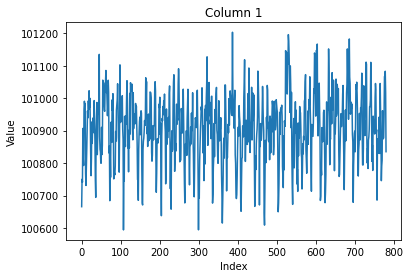

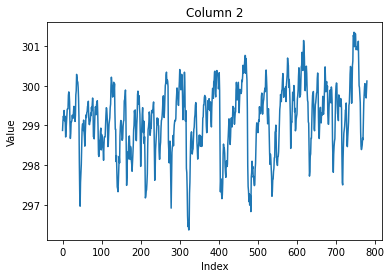

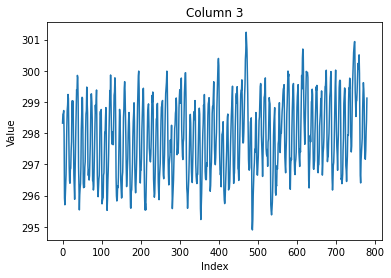

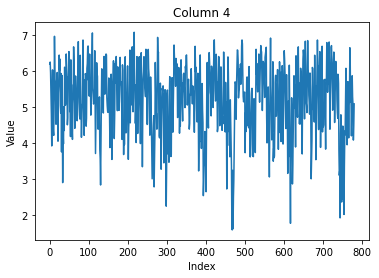

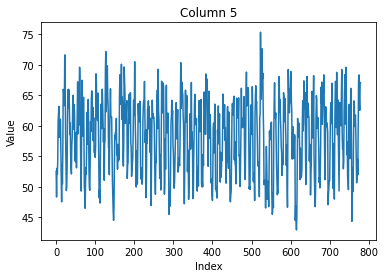

In [328]:
ECearth_data = ECearth
last_two_mean = np.mean(ECearth_data[-2:, :], axis=0)
ECearth_data = ECearth[:-2, :]
ECearth_data[3, :] *= -1

ECearth_data_final = np.vstack((ECearth_data, last_two_mean))
ECearth_data_final = ECearth_data_final.T
print(ECearth_data_final)

num_columns = ECearth_data_final.shape[1]

# Create separate plots for each column
for i in range(num_columns):
    plt.figure()  # Create a new figure for each plot
    plt.plot(ECearth_data_final[:, i])  # Plot the values of the current column
    plt.title('Column {}'.format(i+1))  # Set a title for the plot
    plt.xlabel('Index')  # Set the x-axis label
    plt.ylabel('Value')  # Set the y-axis label

# Display all the plots
plt.show()


In [240]:
MIROC6_nc_names = ['MIROC6_slp_130-150.nc',
             'MIROC6_t_-150--130.nc',
             'MIROC6_t--100--80.nc',
             'MIROC6_zws_-180--130.nc',
             'hfls_Amon_MIROC6_historical_r1i1p1f1_gn_19500116-20141216_v20181212.nc',
             'hfss_Amon_MIROC6_historical_r1i1p1f1_gn_19500116-20141216_v20181212.nc']

MIROC6_csv_names = ['mean_WPAC_MIROC6',
                   'mean_CPAC_MIROC6',
                   'mean_EPAC_MIROC6',
                   'mean_ZWS_MIROC6',
                   'mean_LHF_MIROC6',
                   'mean_SHF_MIROC6'
                  ]

MIROC6_var_names = ['psl',
            'tas',
            'tas',
            'uas',
            'hfls',
            'hfss']

MIROC6_data = []

for i in range(len(MIROC6_nc_names)):
    if i ==0:
        data = ncfiles_to_series(MIROC6_nc_names[i],MIROC6_csv_names[i], MIROC6_var_names[i], 'MIROC6')
    else:
        more_data = ncfiles_to_series(MIROC6_nc_names[i], MIROC6_csv_names[i], MIROC6_var_names[i], 'MIROC6')
        data = np.vstack((data, more_data))

In [241]:
MIROC6_data = data
last_two_mean = np.mean(MIROC6_data[-2:, :], axis=0)
MIROC6_data = data[:-2, :]
MIROC6_data[3, :] *= -1

MIROC6_data_final = np.vstack((MIROC6_data, last_two_mean))
MIROC6_data_final = MIROC6_data_final.T



# EC Earth

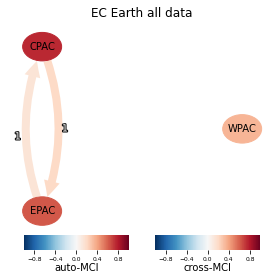

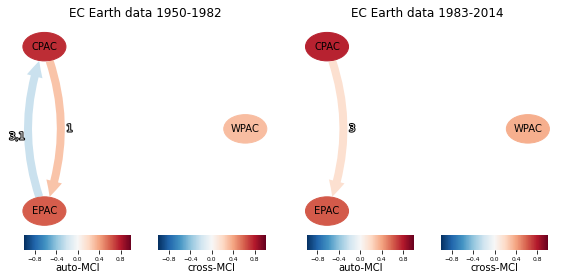

In [298]:
ec_1, ec2 = firsthalf_lasthalf(ECearth_data_final, parcorr, 'EC Earth', extended = 0)

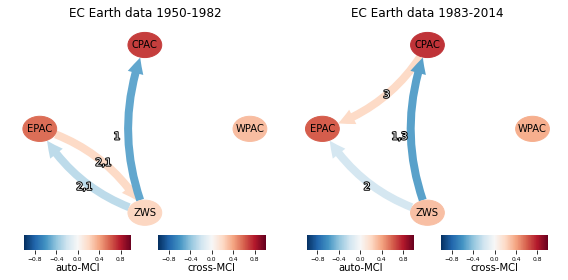

In [286]:
ec3, ec4 = firsthalf_lasthalf(ECearth_data_final, parcorr, 'EC Earth', extended = 1)

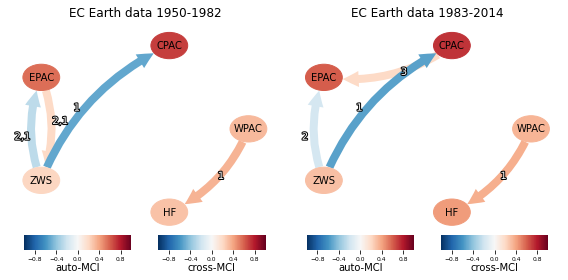

In [287]:
ec5, ec6 = firsthalf_lasthalf(ECearth_data_final, parcorr, 'EC Earth', extended = 2)

# GFDL-ESM4

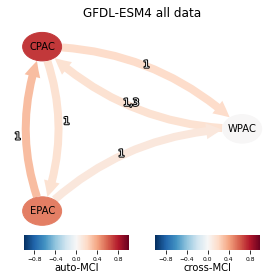

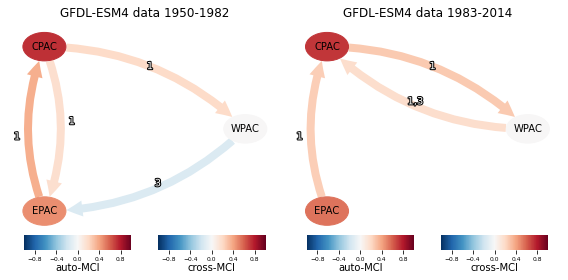

In [299]:
gfdl1, gfdl2 = firsthalf_lasthalf(GFDL_data_final, parcorr, 'GFDL-ESM4', extended = 0)

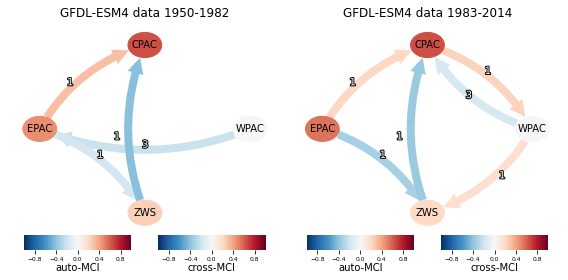

In [289]:
gfdl3, gfdl4 = firsthalf_lasthalf(GFDL_data_final, parcorr, 'GFDL-ESM4', extended = 1)

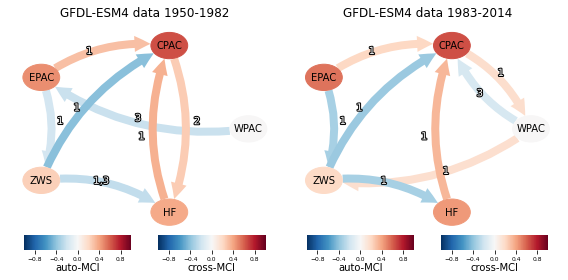

In [290]:
gfdl5, gfdl6 = firsthalf_lasthalf(GFDL_data_final, parcorr, 'GFDL-ESM4', extended = 2)

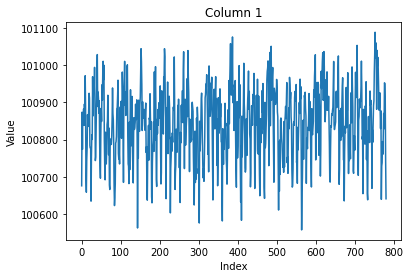

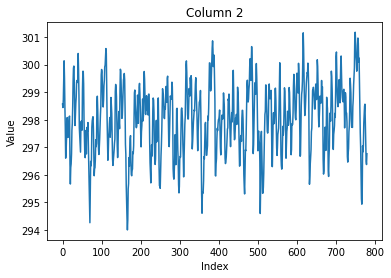

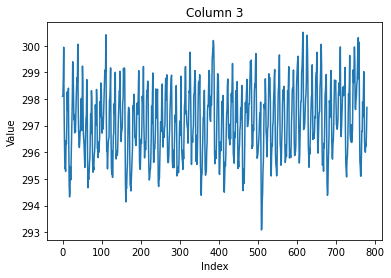

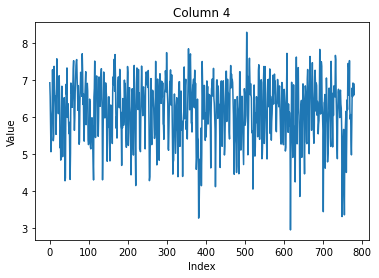

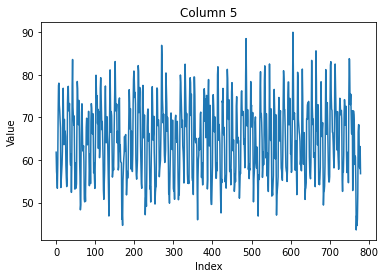

In [291]:
num_columns = GFDL_data_final.shape[1]

# Create separate plots for each column
for i in range(num_columns):
    plt.figure()  # Create a new figure for each plot
    plt.plot(GFDL_data_final[:, i])  # Plot the values of the current column
    plt.title('Column {}'.format(i+1))  # Set a title for the plot
    plt.xlabel('Index')  # Set the x-axis label
    plt.ylabel('Value')  # Set the y-axis label

# Display all the plots
plt.show()

# MIROC6

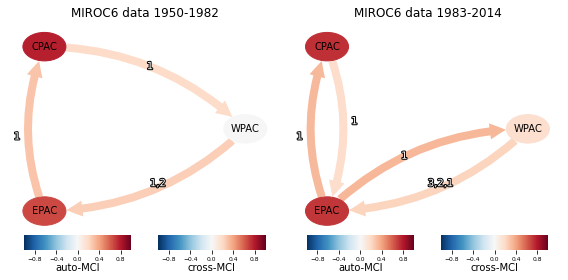

In [242]:
MIROC61, MIROC62 = firsthalf_lasthalf(MIROC6_data_final, parcorr, 'MIROC6', extended = 0)

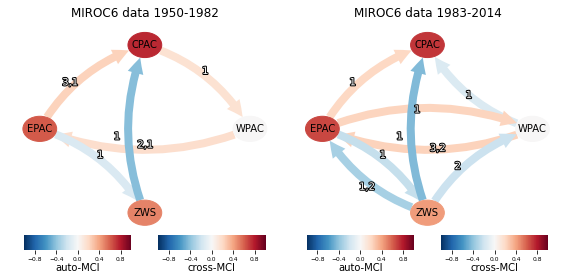

In [243]:
MIROC63, MIROC64 = firsthalf_lasthalf(MIROC6_data_final, parcorr, 'MIROC6', extended = 1)



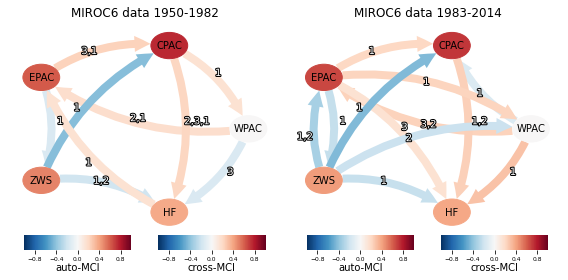

In [244]:
MIROC65, MIROC66 = firsthalf_lasthalf(MIROC6_data_final, parcorr, 'MIROC6', extended = 2)



# VANAF HIER RUNNEN

In [2]:
def ncfiles_to_series(nc_file_name, csv_file_name, var_name, model_map):
# Open the NetCDF file
    file_path = f'CDS data/{model_map}/' + nc_file_name
    ds = xr.open_dataset(file_path)
    ds.to_dataframe().to_csv('CDS data/csv_data/' + csv_file_name)
    var = pd.read_csv('CDS data/csv_data/' + csv_file_name)
    # Convert the 'time' column to datetime type
    var['time'] = pd.to_datetime(var['time'])
    # Group the DataFrame by the date and calculate the mean of 'ts' for each date
    var = var.groupby(var['time'].dt.date)[var_name].mean()
    array = []
    for i in range(len(var)):
        array.append(var[i])
    return array

# function to detrend + deseazonalize data
def deTrend_deSeasonalize(data, show_plot = True):
    # step 1: seasonal component
    decomposition = seasonal_decompose(data, model='additive', period=12)
    data = data - decomposition.seasonal
    # step 2: Trend based on Gaussian kernel smoother
    smoothed = pp.smooth(np.copy(data), smooth_width=15 * 12, residuals=False)
    index = range(0, len(data))

    if show_plot == True:
        plt.plot(index, data)
        plt.plot(index,smoothed)
        plt.legend(['data', 'Smoothed trend'])
        plt.title("Deseasonalized data with smoothed trend")
        plt.show()

    else:
        result = data - smoothed
        return result
# function to detrend data
def deTrend(data):
    # Trend based on Gaussian kernel smoother
    smoothed = pp.smooth(np.copy(data), smooth_width=30 * 12, residuals=True)
    return smoothed

# function that makes El nino, La nina mask
# input data from correct years + 1 from the climate explorer
# set to False if we do NOT want to mask this value

def mask_maker(df_sstnino34):
    nino34list = df_sstnino34[:,1:].reshape(-1)

    nino34list = deTrend(nino34list)
    nino34list_by_year = nino34list.reshape(-1,12)

    # NINO MASK
    
    ninamask = np.ones(len(nino34list)).reshape(-1,12)
    ninomask = np.ones(len(nino34list)).reshape(-1,12)
    neutralmask = np.ones(len(nino34list)).reshape(-1,12)

    for i in range(len(nino34list_by_year)-1):
        if (nino34list_by_year[i,10] + nino34list_by_year[i,11] + nino34list_by_year[i+1,0])/3 > 0.5:
            ninomask[i,1:] = False
            ninomask[i+1,0] = False
    ninomask = ninomask[:len(ninomask),:].reshape(-1)
    ninomask = ninomask[:-12]
    
    for i in range(len(nino34list_by_year)-1):
        if (nino34list_by_year[i,10] + nino34list_by_year[i,11] + nino34list_by_year[i+1,0])/3 < -0.5:
            ninamask[i,1:] = False
            ninamask[i+1,0] = False
    ninamask = ninamask[:len(ninamask),:].reshape(-1)
    ninamask = ninamask[:-12]
    
    for i in range(len(nino34list_by_year)-1):
        if -0.5 < (nino34list_by_year[i,10] + nino34list_by_year[i,11] + nino34list_by_year[i+1,0])/3 < 0.5:
            neutralmask[i,1:] = False
            neutralmask[i+1,0] = False
    #neutralmask = neutralmask[:len(neutralmask)-1,:].reshape(-1)
    neutralmask = neutralmask[:len(neutralmask),:].reshape(-1)  
    neutralmask = neutralmask[:-12]
    
    return ninomask, ninamask, neutralmask


def compute_f1_score(pcmci_result_referencemodel, pcmci_result_othermodel, threshold):
    reference = np.where(pcmci_result_referencemodel['p_matrix'].round(3) < threshold, 1, 0)
    other = np.where(pcmci_result_othermodel['p_matrix'].round(3) < threshold, 1, 0)
    other_flat = other.flatten()
    reference_flat = reference.flatten()
    f1 = f1_score(reference_flat, other_flat)
    return f1

def count_enso(mask,year):
    count = 0
    for i in range(len(mask)-year*12, len(mask), 12):
        if mask[i+3] == 0:
            count+=1
            
    return count

# define parcorr
parcorr = ParCorr(significance='analytic', mask_type='y')



In [3]:
os.chdir('/Users/esz320/Documents/Thesis to paper/Data') 

start_year = 1950
length = 12*(2022 - start_year)

extended_data = np.vstack((
    np.loadtxt('iera5_slp_130-150E_-5-5N_n.dat.txt', skiprows=20)[:, 1:].reshape(-1)[:length],
    np.loadtxt('iera5_t2m_-150--130E_-5-5N_n.dat.txt', skiprows=20)[:, 1:].reshape(-1)[:length],
    np.loadtxt('iera5_t2m_-100--80E_-5-5N_n.dat.txt', skiprows=20)[:, 1:].reshape(-1)[:length],
    #np.loadtxt('iera5_u10m_-210--100E_-5-5N_n.dat.txt', skiprows=20)[:, 1:].reshape(-1)[:length],
    np.loadtxt('iera5_u10m_-180--130E_-5-5N_n.dat.txt', skiprows=20)[:, 1:].reshape(-1)[:length],
    #np.loadtxt('iera5_trbflx_-210--100E_-5-5N_n.dat.txt', skiprows=20)[:, 1:].reshape(-1)[:length],
    np.loadtxt('iera5_trbflx_-180--130E_-5-5N_n.dat.txt', skiprows=20)[:, 1:].reshape(-1)[:length],
    #np.loadtxt('iera5_lhf_-180--130E_-5-5N_n.dat.txt', skiprows=20)[:, 1:].reshape(-1)[:length],
                ))
extended_data[3, :] *= -1
extended_data[4, :] *= -1/2

print(extended_data)

# last_two_mean = np.mean(extended_data[-2:, :], axis=0)
# extended_data = extended_data[:-2, :]
# extended_data[3, :] *= -1

# extended_data = np.vstack((extended_data, last_two_mean))

extended_data = extended_data.T

print(extended_data)

[[1.007654e+05 1.007447e+05 1.008298e+05 ... 1.009609e+05 1.008551e+05
  1.008284e+05]
 [2.977563e+02 2.978752e+02 2.985520e+02 ... 2.977851e+02 2.977210e+02
  2.978257e+02]
 [2.966236e+02 2.977186e+02 2.979710e+02 ... 2.954964e+02 2.954913e+02
  2.957404e+02]
 [6.193619e+00 6.642407e+00 5.747903e+00 ... 5.994689e+00 6.632870e+00
  6.947123e+00]
 [6.411725e+01 5.421315e+01 5.163650e+01 ... 6.706300e+01 7.639825e+01
  6.295330e+01]]
[[1.007654e+05 2.977563e+02 2.966236e+02 6.193619e+00 6.411725e+01]
 [1.007447e+05 2.978752e+02 2.977186e+02 6.642407e+00 5.421315e+01]
 [1.008298e+05 2.985520e+02 2.979710e+02 5.747903e+00 5.163650e+01]
 ...
 [1.009609e+05 2.977851e+02 2.954964e+02 5.994689e+00 6.706300e+01]
 [1.008551e+05 2.977210e+02 2.954913e+02 6.632870e+00 7.639825e+01]
 [1.008284e+05 2.978257e+02 2.957404e+02 6.947123e+00 6.295330e+01]]


In [4]:
MIROC6_nc_names = ['psl_Amon_MIROC6_historical_r1i1p1f1_gn_19500116-20141216_v20181212.nc',
             'Ctas_Amon_MIROC6_historical_r1i1p1f1_gn_19500116-20141216_v20181212.nc',
             'tas_Amon_MIROC6_historical_r1i1p1f1_gn_19500116-20141216_v20181212.nc',
             'uas_Amon_MIROC6_historical_r1i1p1f1_gn_19500116-20141216_v20181212.nc',
             'hfls_Amon_MIROC6_historical_r1i1p1f1_gn_19500116-20141216_v20181212.nc',
             'hfss_Amon_MIROC6_historical_r1i1p1f1_gn_19500116-20141216_v20181212.nc']

MIROC6_csv_names = ['mean_WPAC_MIROC6',
                   'mean_CPAC_MIROC6',
                   'mean_EPAC_MIROC6',
                   'mean_ZWS_MIROC6',
                   'mean_LHF_MIROC6',
                   'mean_SHF_MIROC6'
                  ]

MIROC6_var_names = ['psl',
            'tas',
            'tas',
            'uas',
            'hfls',
            'hfss']

MIROC6_data = []

for i in range(len(MIROC6_nc_names)):
    if i ==0:
        data = ncfiles_to_series(MIROC6_nc_names[i],MIROC6_csv_names[i], MIROC6_var_names[i], 'MIROC')
    else:
        more_data = ncfiles_to_series(MIROC6_nc_names[i], MIROC6_csv_names[i], MIROC6_var_names[i], 'MIROC')
        data = np.vstack((data, more_data)) 

C:\Users\esz320\AppData\Local\Temp\ipykernel_18200\2648464128.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array.append(var[i])
C:\Users\esz320\AppData\Local\Temp\ipykernel_18200\2648464128.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array.append(var[i])
C:\Users\esz320\AppData\Local\Temp\ipykernel_18200\2648464128.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array.append(var[i])
C:\Users\esz320\AppData\Loca

In [5]:
MIROC6_data = data

print(MIROC6_data)
last_two_mean = np.mean(MIROC6_data[-2:, :], axis=0)
MIROC6_data = data[:-2, :]
MIROC6_data[3, :] *= -1

MIROC6_data_final = np.vstack((MIROC6_data, last_two_mean))
MIROC6_data_final = MIROC6_data_final.T



[[ 1.00348382e+05  1.00489137e+05  1.00713413e+05 ...  1.00738412e+05
   1.00516119e+05  1.00488633e+05]
 [ 2.98048121e+02  2.98410155e+02  2.98966475e+02 ...  2.95977317e+02
   2.95497992e+02  2.95104497e+02]
 [ 2.98910386e+02  2.99709437e+02  2.99896208e+02 ...  2.97309036e+02
   2.97724429e+02  2.97909005e+02]
 [-7.35383613e+00 -5.50135826e+00 -5.78137728e+00 ... -5.44275125e+00
  -7.10011320e+00 -6.85309644e+00]
 [ 1.39177663e+02  1.12332826e+02  1.13329355e+02 ...  9.79576192e+01
   1.22710430e+02  1.13521547e+02]
 [ 1.81406340e+00  2.41844911e+00  1.89042829e+00 ...  5.07162801e+00
   4.49169889e+00  4.65169867e+00]]


In [6]:
ECearth_nc_names = ['psl_Amon_EC-Earth3-AerChem_historical_r1i1p1f1_gr_19500116-20141216_v20200624.nc',
             'tas_Amon_EC-Earth3-AerChem_historical_r1i1p1f1_gr_19500116-20141216_v20200624.nc',
             'Etas_Amon_EC-Earth3-AerChem_historical_r1i1p1f1_gr_19500116-20141216_v20200624.nc',
             'uas_Amon_EC-Earth3-AerChem_historical_r1i1p1f1_gr_19500116-20141216_v20200624.nc',
             'hfls_Amon_EC-Earth3-AerChem_historical_r1i1p1f1_gr_19500116-20141216_v20200624.nc',
             'hfss_Amon_EC-Earth3-AerChem_historical_r1i1p1f1_gr_19500116-20141216_v20200624.nc']

ECearth_csv_names = ['mean_WPAC_ECearth',
                   'mean_CPAC_ECearth',
                   'mean_EPAC_ECearth',
                   'mean_ZWS_ECearth',
                   'mean_LHF_ECearth',
                   'mean_SHF_ECearth'
                  ]

ECearth_var_names = ['psl',
            'tas',
            'tas',
            'uas',
            'hfls',
            'hfss']

ECearth_data = []

for i in range(len(ECearth_nc_names)):
    if i ==0:
        ECearth = ncfiles_to_series(ECearth_nc_names[i],ECearth_csv_names[i], ECearth_var_names[i], 'EC')
    else:
        more_ECearth = ncfiles_to_series(ECearth_nc_names[i], ECearth_csv_names[i], ECearth_var_names[i], 'EC')
        ECearth = np.vstack((ECearth, more_ECearth))
        
    

C:\Users\esz320\AppData\Local\Temp\ipykernel_18200\2648464128.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array.append(var[i])
C:\Users\esz320\AppData\Local\Temp\ipykernel_18200\2648464128.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array.append(var[i])
C:\Users\esz320\AppData\Local\Temp\ipykernel_18200\2648464128.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array.append(var[i])
C:\Users\esz320\AppData\Loca

In [7]:
ECearth_data = ECearth
last_two_mean = np.mean(ECearth_data[-2:, :], axis=0)
ECearth_data = ECearth[:-2, :]
ECearth_data[3, :] *= -1

ECearth_data_final = np.vstack((ECearth_data, last_two_mean))
ECearth_data_final = ECearth_data_final.T



In [8]:
def link_robustness(GFDL_data, parcorr, extended = 0, info = True, model = 'model'):
    parcorr = ParCorr(confidence='analytic', mask_type='y')
    if extended == 0:

        # Variable names used throughout
        var_names = ['WPAC', 'CPAC', 'EPAC']
        GFDL_data = GFDL_data[:,:3]

        # make data frame of data
        df_GFDL = pd.DataFrame(GFDL_data, columns=var_names)
        dataframe_GFDL = pp.DataFrame(GFDL_data, 
                                 datatime = np.arange(len(GFDL_data)), 
                                 var_names=var_names)

        cpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['CPAC'], show_plot = False)
        epac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['EPAC'], show_plot = False)
        wpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['WPAC'], show_plot = False)

        df_GFDL_processed = pd.DataFrame({'WPAC': wpac_detrend_GFDL, 'CPAC': cpac_detrend_GFDL, 'EPAC': epac_detrend_GFDL})
    
    elif extended == 1:

        # Variable names used throughout
        var_names = ['WPAC', 'CPAC', 'EPAC', 'TW']
        GFDL_data = GFDL_data[:,:4]

        
        # make data frame of data
        df_GFDL = pd.DataFrame(GFDL_data, columns=var_names)
        dataframe_GFDL = pp.DataFrame(GFDL_data, 
                                 datatime = np.arange(len(GFDL_data)), 
                                 var_names=var_names)

        cpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['CPAC'], show_plot = False)
        epac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['EPAC'], show_plot = False)
        wpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['WPAC'], show_plot = False)
        zws_detrend = deTrend_deSeasonalize(df_GFDL['TW'], show_plot = False)
        
        df_GFDL_processed = pd.DataFrame({'WPAC': wpac_detrend_GFDL, 
                                        'CPAC': cpac_detrend_GFDL, 
                                        'EPAC': epac_detrend_GFDL,
                                        'TW': zws_detrend})
        
        #df_GFDL_processed['ZWS'] = df_GFDL_processed['ZWS']*-1
    
    elif extended == 2:
        # Variable names used throughout
        var_names = ['WPAC', 'CPAC', 'EPAC', 'TW', 'NHF']

        # make data frame of data
        df_GFDL = pd.DataFrame(GFDL_data, columns=var_names)
        dataframe_GFDL = pp.DataFrame(GFDL_data, 
                                 datatime = np.arange(len(GFDL_data)), 
                                 var_names=var_names)

        cpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['CPAC'], show_plot = False)
        epac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['EPAC'], show_plot = False)
        wpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['WPAC'], show_plot = False)
        zws_detrend = deTrend_deSeasonalize(df_GFDL['TW'], show_plot = False)
        nhf_detrend = deTrend_deSeasonalize(df_GFDL['NHF'], show_plot = False)
        
        df_GFDL_processed = pd.DataFrame({'WPAC': wpac_detrend_GFDL, 
                                        'CPAC': cpac_detrend_GFDL, 
                                        'EPAC': epac_detrend_GFDL,
                                        'ZWS': zws_detrend,
                                        'NHF': nhf_detrend})
        
        #df_GFDL_processed['ZWS'] = df_GFDL_processed['ZWS']*-1
    
    # 1950-1980
    test1vroeg = df_GFDL_processed[:360]
    # 1951-1982
    test2vroeg = df_GFDL_processed[12:384]
    #1952-1979
    test3vroeg = df_GFDL_processed[24:348]
    #1950-1982
    test4vroeg = df_GFDL_processed[:384]
    # 1980-2010
    test1laat = df_GFDL_processed[360:-48]
    # 1982-2013
    test2laat = df_GFDL_processed[384:-12]
    #1981-2012
    test3laat = df_GFDL_processed[372:-24]
    #1982-2014
    test4laat = df_GFDL_processed[384:]
    
    # Construct mask for spring barrier
    cycle_length = 12
    springbarrier_mask = np.ones(test1vroeg.shape, dtype=bool)
    for i in [4, 5, 6, 7, 8, 9, 10, 11, 0]:
        springbarrier_mask[i::cycle_length, :] = False
    
    dataframe_GFDL = pp.DataFrame(np.copy(test1vroeg), datatime = {0:np.arange(len(test1vroeg))}, var_names= var_names, mask = springbarrier_mask)
    pcmci_GFDL = PCMCI(dataframe=dataframe_GFDL, cond_ind_test=parcorr,verbosity=0)
    results_test1vroeg = pcmci_GFDL.run_pcmci(tau_max=3, tau_min=1, pc_alpha=0.05, alpha_level=0.01, fdr_method = 'fdr_bh')
    
        # Construct mask for spring barrier
    cycle_length = 12
    springbarrier_mask = np.ones(test2vroeg.shape, dtype=bool)
    for i in [4, 5, 6, 7, 8, 9, 10, 11, 0]:
        springbarrier_mask[i::cycle_length, :] = False
    
    dataframe_GFDL = pp.DataFrame(np.copy(test2vroeg), datatime = {0:np.arange(len(test2vroeg))}, var_names= var_names, mask = springbarrier_mask)
    pcmci_GFDL = PCMCI(dataframe=dataframe_GFDL, cond_ind_test=parcorr,verbosity=0)
    results_test2vroeg = pcmci_GFDL.run_pcmci(tau_max=3, tau_min=1, pc_alpha=0.05, alpha_level=0.05, fdr_method = 'fdr_bh')
    
        # Construct mask for spring barrier
    cycle_length = 12
    springbarrier_mask = np.ones(test3vroeg.shape, dtype=bool)
    for i in [4, 5, 6, 7, 8, 9, 10, 11, 0]:
        springbarrier_mask[i::cycle_length, :] = False
    
    dataframe_GFDL = pp.DataFrame(np.copy(test3vroeg), datatime = {0:np.arange(len(test3vroeg))}, var_names= var_names, mask = springbarrier_mask)
    pcmci_GFDL = PCMCI(dataframe=dataframe_GFDL, cond_ind_test=parcorr,verbosity=0)
    results_test3vroeg = pcmci_GFDL.run_pcmci(tau_max=3, tau_min=1, pc_alpha=0.05, alpha_level=0.05, fdr_method = 'fdr_bh')

        # Construct mask for spring barrier
    cycle_length = 12
    springbarrier_mask = np.ones(test4vroeg.shape, dtype=bool)
    for i in [4, 5, 6, 7, 8, 9, 10, 11, 0]:
        springbarrier_mask[i::cycle_length, :] = False
    
    dataframe_GFDL = pp.DataFrame(np.copy(test4vroeg), datatime = {0:np.arange(len(test4vroeg))}, var_names= var_names, mask = springbarrier_mask)
    pcmci_GFDL = PCMCI(dataframe=dataframe_GFDL, cond_ind_test=parcorr,verbosity=0)
    results_test4vroeg = pcmci_GFDL.run_pcmci(tau_max=3, tau_min=1, pc_alpha=0.05, alpha_level=0.05, fdr_method = 'fdr_bh')

        # Construct mask for spring barrier
    cycle_length = 12
    springbarrier_mask = np.ones(test1laat.shape, dtype=bool)
    for i in [4, 5, 6, 7, 8, 9, 10, 11, 0]:
        springbarrier_mask[i::cycle_length, :] = False
    
    dataframe_GFDL = pp.DataFrame(np.copy(test1laat), datatime = {0:np.arange(len(test1laat))}, var_names= var_names, mask = springbarrier_mask)
    pcmci_GFDL = PCMCI(dataframe=dataframe_GFDL, cond_ind_test=parcorr,verbosity=0)
    results_test1laat = pcmci_GFDL.run_pcmci(tau_max=3, tau_min=1, pc_alpha=0.05, alpha_level=0.05, fdr_method = 'fdr_bh')
    
        # Construct mask for spring barrier
    cycle_length = 12
    springbarrier_mask = np.ones(test2laat.shape, dtype=bool)
    for i in [4, 5, 6, 7, 8, 9, 10, 11, 0]:
        springbarrier_mask[i::cycle_length, :] = False
    
    dataframe_GFDL = pp.DataFrame(np.copy(test2laat), datatime = {0:np.arange(len(test2laat))}, var_names= var_names, mask = springbarrier_mask)
    pcmci_GFDL = PCMCI(dataframe=dataframe_GFDL, cond_ind_test=parcorr,verbosity=0)
    results_test2laat = pcmci_GFDL.run_pcmci(tau_max=3, tau_min=1, pc_alpha=0.05, alpha_level=0.05, fdr_method = 'fdr_bh')
    
        # Construct mask for spring barrier
    cycle_length = 12
    springbarrier_mask = np.ones(test3laat.shape, dtype=bool)
    for i in [4, 5, 6, 7, 8, 9, 10, 11, 0]:
        springbarrier_mask[i::cycle_length, :] = False
    
    dataframe_GFDL = pp.DataFrame(np.copy(test3laat), datatime = {0:np.arange(len(test3laat))}, var_names= var_names, mask = springbarrier_mask)
    pcmci_GFDL = PCMCI(dataframe=dataframe_GFDL, cond_ind_test=parcorr,verbosity=0)
    results_test3laat = pcmci_GFDL.run_pcmci(tau_max=3, tau_min=1, pc_alpha=0.05, alpha_level=0.05, fdr_method = 'fdr_bh')

        # Construct mask for spring barrier
    cycle_length = 12
    springbarrier_mask = np.ones(test4laat.shape, dtype=bool)
    for i in [4, 5, 6, 7, 8, 9, 10, 11, 0]:
        springbarrier_mask[i::cycle_length, :] = False
    
    dataframe_GFDL = pp.DataFrame(np.copy(test4laat), datatime = {0:np.arange(len(test4laat))}, var_names= var_names, mask = springbarrier_mask)
    pcmci_GFDL = PCMCI(dataframe=dataframe_GFDL, cond_ind_test=parcorr,verbosity=0)
    results_test4laat = pcmci_GFDL.run_pcmci(tau_max=3, tau_min=1, pc_alpha=0.05, alpha_level=0.05, fdr_method = 'fdr_bh')
    
    if info == True:
        ## PLOT ALL DAGS

        fig, axes = plt.subplots(4, 2, figsize=(8, 16), tight_layout=True)

        tp.plot_graph(
            val_matrix=results_test1vroeg['val_matrix'],
            graph=results_test1vroeg['graph'],
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI',
            fig_ax= (fig, axes[0,0]))
        axes[0,0].set_title('1950-1980')

        tp.plot_graph(
            val_matrix=results_test1laat['val_matrix'],
            graph=results_test1laat['graph'],
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI',
            fig_ax= (fig, axes[0,1]))
        axes[0,1].set_title('1980-2010')

        tp.plot_graph(
            val_matrix=results_test2vroeg['val_matrix'],
            graph=results_test2vroeg['graph'],
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI',
            fig_ax= (fig, axes[1,0]))
        axes[1,0].set_title('1951-1982')
        
        tp.plot_graph(
            val_matrix=results_test2laat['val_matrix'],
            graph=results_test2laat['graph'],
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI',
            fig_ax= (fig, axes[1,1]))
        axes[1,1].set_title('1982-2013')
        
        tp.plot_graph(
            val_matrix=results_test3vroeg['val_matrix'],
            graph=results_test3vroeg['graph'],
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI',
            fig_ax= (fig, axes[2,0]))
        axes[2,0].set_title('1952-1979')
        
        tp.plot_graph(
            val_matrix=results_test3laat['val_matrix'],
            graph=results_test3laat['graph'],
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI',
            fig_ax= (fig, axes[2,1]))
        axes[2,1].set_title('1981-2012')
        
        tp.plot_graph(
            val_matrix=results_test4vroeg['val_matrix'],
            graph=results_test4vroeg['graph'],
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI',
            fig_ax= (fig, axes[3,0]))
        axes[3,0].set_title('1950-1981')

        tp.plot_graph(
            val_matrix=results_test4laat['val_matrix'],
            graph=results_test4laat['graph'],
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI',
            fig_ax= (fig, axes[3,1]))
        axes[3,1].set_title('1982-2014')

        fig.suptitle(f'Causal networks based on {model} data', fontsize = 18)
    
        plt.subplots_adjust(hspace=0.8)
        plt.show()
        
        return results_test1vroeg, results_test2vroeg, results_test3vroeg, results_test4vroeg, results_test1laat, results_test2laat, results_test3laat, results_test4laat
    
    

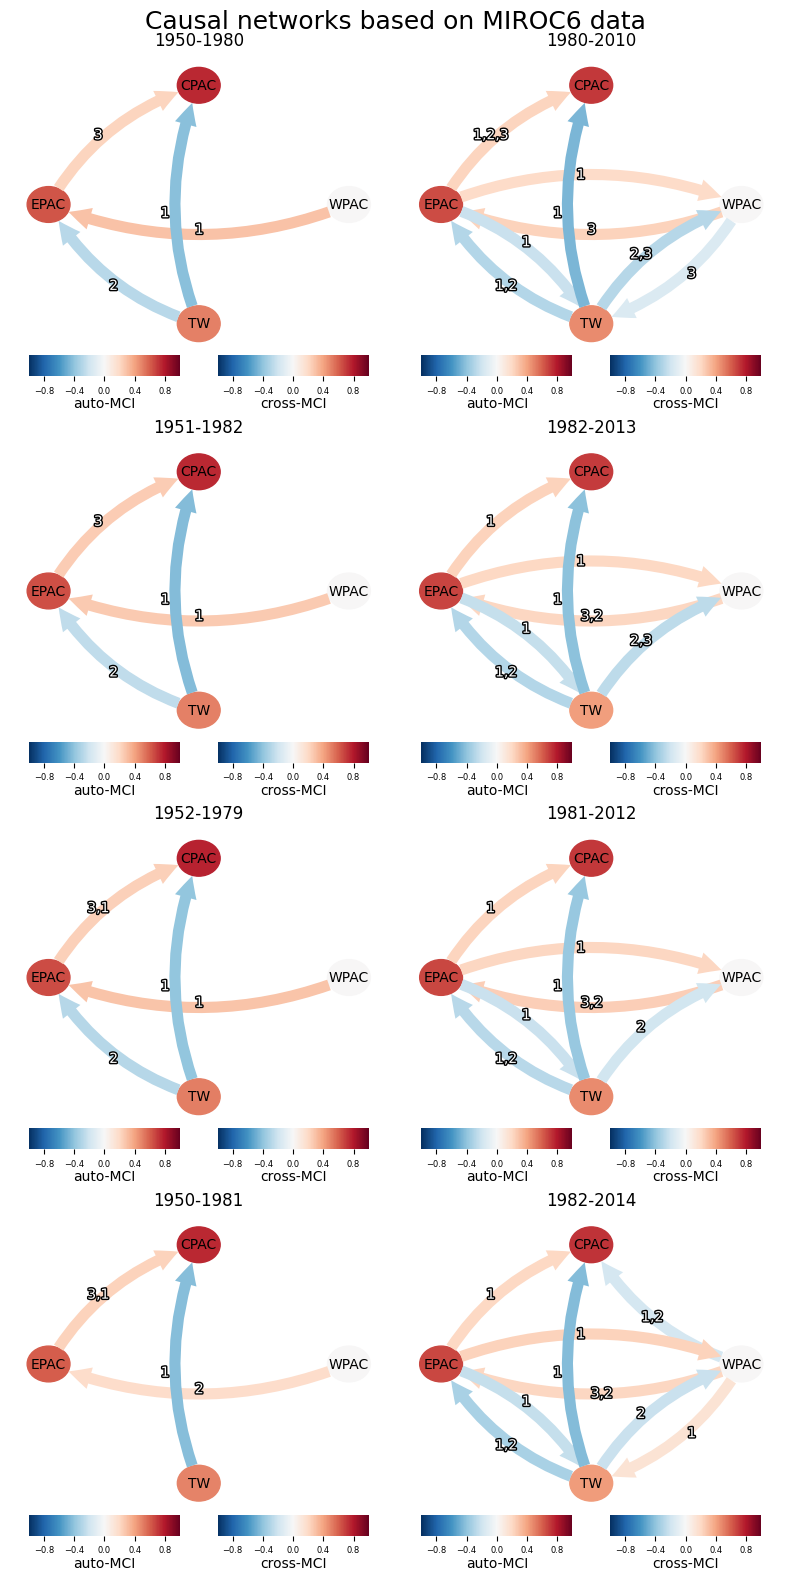

In [35]:
MIROC6_1vroeg, MIROC6_2vroeg, MIROC6_3vroeg, MIROC6_4vroeg, MIROC6_1laat, MIROC6_2laat, MIROC6_3laat, MIROC6_4laat = link_robustness(MIROC6_data_final, parcorr, extended = 1, model = 'MIROC6')
var_names = ['WPAC', 'CPAC', 'EPAC', 'TW']

In [36]:
print(MIROC6_4vroeg['val_matrix'])
print(MIROC6_4vroeg['p_matrix'])
print(MIROC6_4vroeg['conf_matrix'])
print(MIROC6_4laat['val_matrix'])


[[[ 0.00000000e+00  1.25916617e-01 -4.81328370e-02 -3.17181030e-02]
  [ 0.00000000e+00 -1.90031662e-02 -7.59516675e-02  2.69823813e-02]
  [ 0.00000000e+00  1.47756919e-01  1.79842471e-01  8.15686105e-02]
  [ 0.00000000e+00  1.34419482e-02 -8.80188762e-02 -6.88163918e-02]]

 [[ 0.00000000e+00  1.50913024e-01 -6.96826980e-03  5.89267905e-05]
  [ 0.00000000e+00  7.53446867e-01 -5.30199062e-02 -1.25504396e-02]
  [ 0.00000000e+00  4.96053295e-02  1.11569150e-02  3.35263486e-02]
  [ 0.00000000e+00  3.49742200e-02 -4.65895510e-02 -9.04609445e-02]]

 [[ 0.00000000e+00  5.59758170e-02  7.10629331e-02 -4.64884967e-02]
  [ 0.00000000e+00  1.58398279e-01  1.00800345e-01  2.30662362e-01]
  [ 0.00000000e+00  6.08777415e-01 -5.79650376e-02  3.10898389e-02]
  [ 0.00000000e+00 -1.44048835e-01 -7.00721225e-02 -4.33642945e-02]]

 [[ 0.00000000e+00 -1.82830597e-03 -1.34585633e-01 -7.39029387e-02]
  [ 0.00000000e+00 -4.27620261e-01  5.00679515e-02 -4.61537427e-02]
  [ 0.00000000e+00 -1.34916029e-01 -1.3345

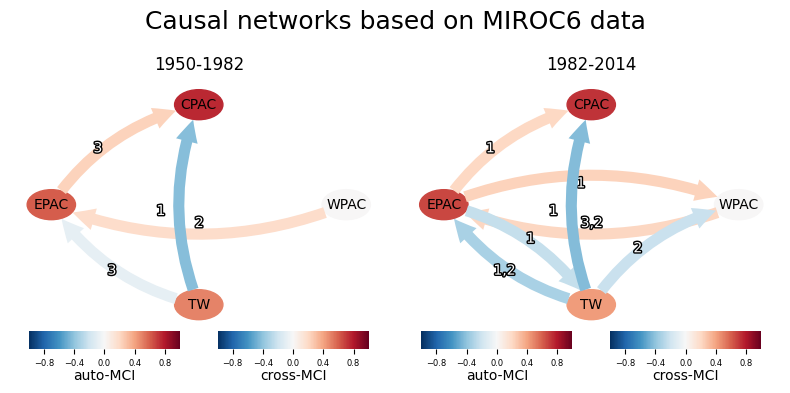

In [37]:
var_names = ['WPAC', 'CPAC', 'EPAC', 'TW']

graph_vroeg_fournode_MIROC6 = np.array([[['', '', '', ''],
        ['', '', '', ''],
        ['', '', '-->', ''],
        ['', '', '', '']],

       [['', '', '', ''],
        ['', '-->', '', ''],
        ['', '', '', ''],
        ['', '', '', '']],

       [['', '', '', ''],
        ['', '', '', '-->'],
        ['', '-->', '', ''],
        ['', '', '', '']],

       [['', '', '', ''],
        ['', '-->', '', ''],
        ['', '', '', '-->'],
        ['', '-->', '-->', '']]], dtype='<U3')

graph_laat_fournode_MIROC6 = np.array([[['', '', '', ''],
        ['', '', '', ''],
        ['', '', '-->', '-->'],
        ['', '', '', '']],

       [['', '', '', ''],
        ['', '-->', '', '-->'],
        ['', '', '', ''],
        ['', '', '', '']],

       [['', '-->', '', ''],
        ['', '-->', '', ''],
        ['', '-->', '', ''],
        ['', '-->', '', '']],

       [['', '', '-->', ''],
        ['', '-->', '', ''],
        ['', '-->', '-->', ''],
        ['', '-->', '-->', '']]], dtype='<U3')

fig, axes = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True)
tp.plot_graph(
            val_matrix=MIROC6_4vroeg['val_matrix'],
            graph=graph_vroeg_fournode_MIROC6,
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI',
            fig_ax= (fig, axes[0]))
axes[0].set_title('1950-1982')

tp.plot_graph(
            val_matrix=MIROC6_4laat['val_matrix'],
            graph=graph_laat_fournode_MIROC6,
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI',
            fig_ax= (fig, axes[1]))
axes[1].set_title('1982-2014')

fig.suptitle(f'Causal networks based on MIROC6 data', fontsize = 18)
    
plt.subplots_adjust(hspace=0.8)
plt.show()

In [38]:
print(MIROC6_4vroeg['val_matrix'])
print(MIROC6_4vroeg['conf_matrix'])
print(MIROC6_4laat['val_matrix'])
print(MIROC6_4laat['conf_matrix'])

[[[ 0.00000000e+00  1.25916617e-01 -4.81328370e-02 -3.17181030e-02]
  [ 0.00000000e+00 -1.90031662e-02 -7.59516675e-02  2.69823813e-02]
  [ 0.00000000e+00  1.47756919e-01  1.79842471e-01  8.15686105e-02]
  [ 0.00000000e+00  1.34419482e-02 -8.80188762e-02 -6.88163918e-02]]

 [[ 0.00000000e+00  1.50913024e-01 -6.96826980e-03  5.89267905e-05]
  [ 0.00000000e+00  7.53446867e-01 -5.30199062e-02 -1.25504396e-02]
  [ 0.00000000e+00  4.96053295e-02  1.11569150e-02  3.35263486e-02]
  [ 0.00000000e+00  3.49742200e-02 -4.65895510e-02 -9.04609445e-02]]

 [[ 0.00000000e+00  5.59758170e-02  7.10629331e-02 -4.64884967e-02]
  [ 0.00000000e+00  1.58398279e-01  1.00800345e-01  2.30662362e-01]
  [ 0.00000000e+00  6.08777415e-01 -5.79650376e-02  3.10898389e-02]
  [ 0.00000000e+00 -1.44048835e-01 -7.00721225e-02 -4.33642945e-02]]

 [[ 0.00000000e+00 -1.82830597e-03 -1.34585633e-01 -7.39029387e-02]
  [ 0.00000000e+00 -4.27620261e-01  5.00679515e-02 -4.61537427e-02]
  [ 0.00000000e+00 -1.34916029e-01 -1.3345

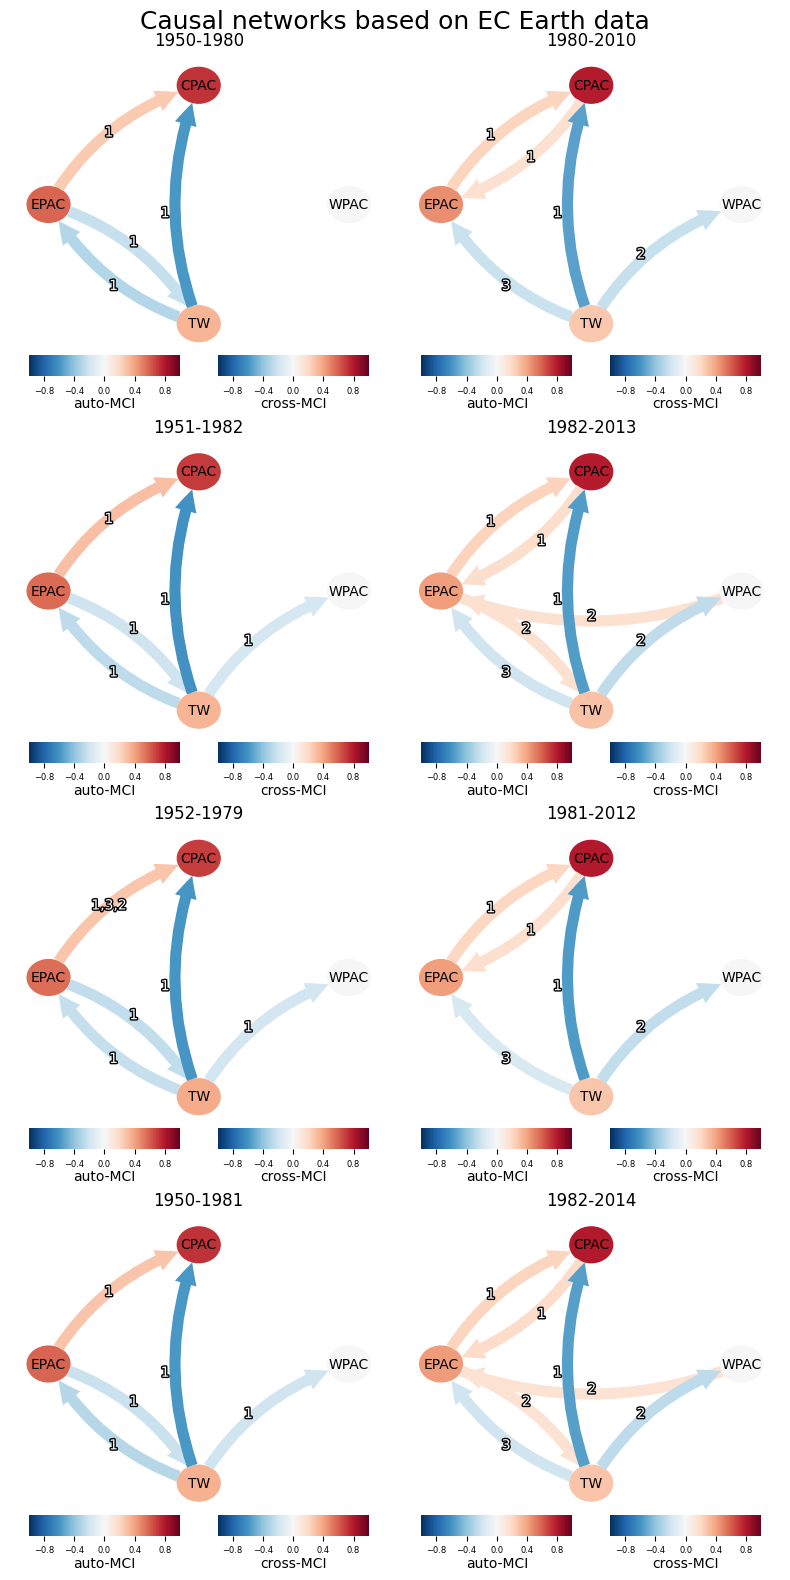

In [39]:
ECEarth_1vroeg, ECEarth_2vroeg, ECEarth_3vroeg, ECEarth_4vroeg, ECEarth_1laat, ECEarth_2laat, ECEarth_3laat, ECEarth_4laat = link_robustness(ECearth_data_final, parcorr, extended = 1, model = 'EC Earth')
var_names = ['WPAC', 'CPAC', 'EPAC', 'TW']

In [40]:
print(ECEarth_4vroeg['val_matrix'])
print(ECEarth_4vroeg['conf_matrix'])
print(ECEarth_4laat['val_matrix'])

[[[ 0.00000000e+00  5.40837521e-02  1.33493120e-01  1.33635892e-01]
  [ 0.00000000e+00  2.68275395e-02 -1.03511168e-01 -4.62345780e-02]
  [ 0.00000000e+00 -5.14971228e-02  4.67326608e-02  2.69485231e-02]
  [ 0.00000000e+00  1.23113096e-01 -8.10564069e-02 -1.01179164e-01]]

 [[ 0.00000000e+00  8.68299213e-02 -1.47915688e-02  4.73238867e-02]
  [ 0.00000000e+00  7.21256350e-01 -1.18729183e-01  1.25251372e-01]
  [ 0.00000000e+00  1.32842946e-01  1.12628173e-01 -7.33368816e-02]
  [ 0.00000000e+00 -5.20871350e-02 -1.22676911e-01 -8.52421613e-02]]

 [[ 0.00000000e+00  7.23951021e-02 -3.67994778e-02 -2.39018823e-02]
  [ 0.00000000e+00  2.84944413e-01 -1.77280077e-02 -1.17399089e-01]
  [ 0.00000000e+00  5.78422645e-01 -1.43481647e-01 -5.87014516e-02]
  [ 0.00000000e+00 -2.18893715e-01  1.30521193e-01 -5.92229360e-02]]

 [[ 0.00000000e+00 -1.99038132e-01  2.91454708e-04 -1.06121511e-01]
  [ 0.00000000e+00 -5.85347589e-01 -1.22300747e-02  5.56504263e-05]
  [ 0.00000000e+00 -2.85639992e-01 -5.6111

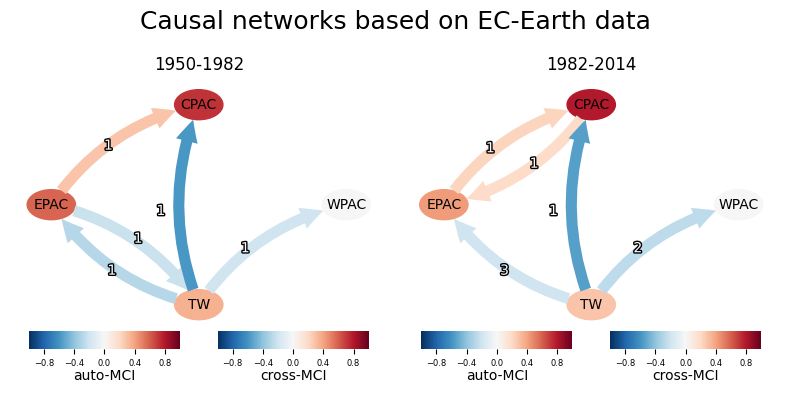

In [41]:
var_names = ['WPAC', 'CPAC', 'EPAC', 'TW']

graph_vroeg_fournode_ECEarth = np.array([[['', '', '', ''],
        ['', '', '', ''],
        ['', '', '', ''],
        ['', '', '', '']],

       [['', '', '', ''],
        ['', '-->', '', ''],
        ['', '', '', ''],
        ['', '', '', '']],

       [['', '', '', ''],
        ['', '-->', '', ''],
        ['', '-->', '', ''],
        ['', '-->', '', '']],

       [['', '-->', '', ''],
        ['', '-->', '', ''],
        ['', '-->', '', ''],
        ['', '-->', '', '']]], dtype='<U3')

graph_laat_fournode_ECEarth = np.array([[['', '', '', ''],
        ['', '', '', ''],
        ['', '', '', ''],
        ['', '', '', '']],

       [['', '', '', ''],
        ['', '-->', '', '-->'],
        ['', '-->', '', ''],
        ['', '', '', '']],

       [['', '', '', ''],
        ['', '-->', '', ''],
        ['', '-->', '', '-->'],
        ['', '', '', '']],

       [['', '', '-->', ''],
        ['', '-->', '', ''],
        ['', '', '', '-->'],
        ['', '-->', '-->', '']]], dtype='<U3')

fig, axes = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True)
tp.plot_graph(
            val_matrix=ECEarth_4vroeg['val_matrix'],
            graph=graph_vroeg_fournode_ECEarth,
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI',
            fig_ax= (fig, axes[0]))
axes[0].set_title('1950-1982')

tp.plot_graph(
            val_matrix=ECEarth_4laat['val_matrix'],
            graph=graph_laat_fournode_ECEarth,
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI',
            fig_ax= (fig, axes[1]))
axes[1].set_title('1982-2014')

fig.suptitle(f'Causal networks based on EC-Earth data', fontsize = 18)
    
plt.subplots_adjust(hspace=0.8)
plt.show()

In [42]:
print(ECEarth_4vroeg['val_matrix'])
print(ECEarth_4vroeg['conf_matrix'])
print(ECEarth_4laat['val_matrix'])
print(ECEarth_4laat['conf_matrix'])

[[[ 0.00000000e+00  5.40837521e-02  1.33493120e-01  1.33635892e-01]
  [ 0.00000000e+00  2.68275395e-02 -1.03511168e-01 -4.62345780e-02]
  [ 0.00000000e+00 -5.14971228e-02  4.67326608e-02  2.69485231e-02]
  [ 0.00000000e+00  1.23113096e-01 -8.10564069e-02 -1.01179164e-01]]

 [[ 0.00000000e+00  8.68299213e-02 -1.47915688e-02  4.73238867e-02]
  [ 0.00000000e+00  7.21256350e-01 -1.18729183e-01  1.25251372e-01]
  [ 0.00000000e+00  1.32842946e-01  1.12628173e-01 -7.33368816e-02]
  [ 0.00000000e+00 -5.20871350e-02 -1.22676911e-01 -8.52421613e-02]]

 [[ 0.00000000e+00  7.23951021e-02 -3.67994778e-02 -2.39018823e-02]
  [ 0.00000000e+00  2.84944413e-01 -1.77280077e-02 -1.17399089e-01]
  [ 0.00000000e+00  5.78422645e-01 -1.43481647e-01 -5.87014516e-02]
  [ 0.00000000e+00 -2.18893715e-01  1.30521193e-01 -5.92229360e-02]]

 [[ 0.00000000e+00 -1.99038132e-01  2.91454708e-04 -1.06121511e-01]
  [ 0.00000000e+00 -5.85347589e-01 -1.22300747e-02  5.56504263e-05]
  [ 0.00000000e+00 -2.85639992e-01 -5.6111

In [375]:
# Variable names used throughout
var_names = ['WPAC', 'CPAC', 'EPAC', 'TW', 'NHF']
    
# make data frame of data
df_miroc6 = pd.DataFrame(MIROC6_data_final, columns=var_names)

In [389]:
print(df_miroc6)

              WPAC        CPAC        EPAC        TW        NHF
0    100348.381893  298.048121  298.910386  7.353836  70.495863
1    100489.137473  298.410155  299.709437  5.501358  57.375638
2    100713.413232  298.966475  299.896208  5.781377  57.609892
3    100594.365402  299.646359  299.658220  4.964899  55.700519
4    100628.577902  299.961002  298.587085  5.470660  63.609612
..             ...         ...         ...       ...        ...
775  100677.498196  295.296172  297.512492  6.961205  49.007260
776  100694.863402  296.315816  297.672579  6.821036  46.792583
777  100738.412063  295.977317  297.309036  5.442751  51.514624
778  100516.118893  295.497992  297.724429  7.100113  63.601064
779  100488.632616  295.104497  297.909005  6.853096  59.086623

[780 rows x 5 columns]


In [377]:
# make data frame of data
df_ecearth = pd.DataFrame(ECearth_data_final, columns=var_names)

In [477]:
df_reanalysis = pd.DataFrame(extended_data[:-84], columns=var_names)
print(df_reanalysis)

         WPAC      CPAC      EPAC        TW       NHF
0    100765.4  297.7563  296.6236  6.193619  64.11725
1    100744.7  297.8752  297.7186  6.642407  54.21315
2    100829.8  298.5520  297.9710  5.747903  51.63650
3    100755.0  298.8250  297.7608  6.185169  53.28400
4    100833.0  299.0785  297.0467  6.157930  61.23575
..        ...       ...       ...       ...       ...
775  101074.2  298.9359  296.4270  5.033906  74.18670
776  101049.8  299.0408  295.8277  5.351639  74.95060
777  100983.2  299.0877  296.3688  4.951334  72.90750
778  100926.0  299.2581  296.7456  4.556111  73.42835
779  100856.4  299.3459  297.2363  5.574538  68.96170

[780 rows x 5 columns]


In [479]:
names = ['TW reanalysis', 'TW EC-Earth', 'TW MIROC6']
df_tw = pd.concat([df_reanalysis['TW'], df_ecearth['TW'], df_miroc6['TW']], axis=1)
df_tw.columns = names

df_WPAC = pd.concat([df_reanalysis['WPAC'], df_ecearth['WPAC'], df_miroc6['WPAC']], axis=1)
nameswpac = ['WPAC reanalysis', 'WPAC EC-Earth', 'WPAC MIROC6']
df_WPAC.columns = nameswpac

df_CPAC = pd.concat([df_reanalysis['CPAC'], df_ecearth['CPAC'], df_miroc6['CPAC']], axis=1)
namescpac = ['CPAC reanalysis', 'CPAC EC-Earth', 'CPAC MIROC6']
df_CPAC.columns = namescpac

df_EPAC = pd.concat([df_reanalysis['EPAC'], df_ecearth['EPAC'], df_miroc6['EPAC']], axis=1)
namesepac = ['EPAC reanalysis', 'EPAC EC-Earth', 'EPAC MIROC6']
df_EPAC.columns = namesepac

df_NHF = pd.concat([df_reanalysis['NHF'], df_ecearth['NHF'], df_miroc6['NHF']], axis=1)
namesnhf = ['NHF reanalysis', 'NHF EC-Earth', 'NHF MIROC6']
df_NHF.columns = namesnhf

In [441]:
print(df_tw)
mean_reanalysis_tw = []
mean_miroc6_tw = []
mean_ecearth_tw = []

for i in range(0,len(df_tw),12):
    if i == len(df_tw) - 12:
        mean_reanalysis_tw = np.append(mean_reanalysis_tw, np.mean(df_tw['TW reanalysis'][i+4:i+11]))
        mean_ecearth_tw = np.append(mean_ecearth_tw, np.mean(df_tw['TW EC-Earth'][i+4:i+11]))         
        mean_miroc6_tw = np.append(mean_miroc6_tw, np.mean(df_tw['TW MIROC6'][i+4:i+11]))
    else:
        mean_reanalysis_tw = np.append(mean_reanalysis_tw, np.mean(df_tw['TW reanalysis'][i+4:i+12]))
        mean_ecearth_tw = np.append(mean_ecearth_tw, np.mean(df_tw['TW EC-Earth'][i+4:i+12]))         
        mean_miroc6_tw = np.append(mean_miroc6_tw, np.mean(df_tw['TW MIROC6'][i+4:i+12]))


mean_tw = pd.DataFrame({'Reanalysis': mean_reanalysis_tw, 'EC-Earth3': mean_ecearth_tw, 'MIROC6': mean_miroc6_tw})

     TW reanalysis  TW EC-Earth  TW MIROC6
0         6.193619     5.231912   7.353836
1         6.642407     6.288037   5.501358
2         5.747903     5.822819   5.781377
3         6.185169     5.184794   4.964899
4         6.157930     4.680327   5.470660
..             ...          ...        ...
775       5.033906     4.587031   6.961205
776       5.351639     4.654695   6.821036
777       4.951334     2.201738   5.442751
778       4.556111     2.824905   7.100113
779       5.574538     2.097657   6.853096

[780 rows x 3 columns]


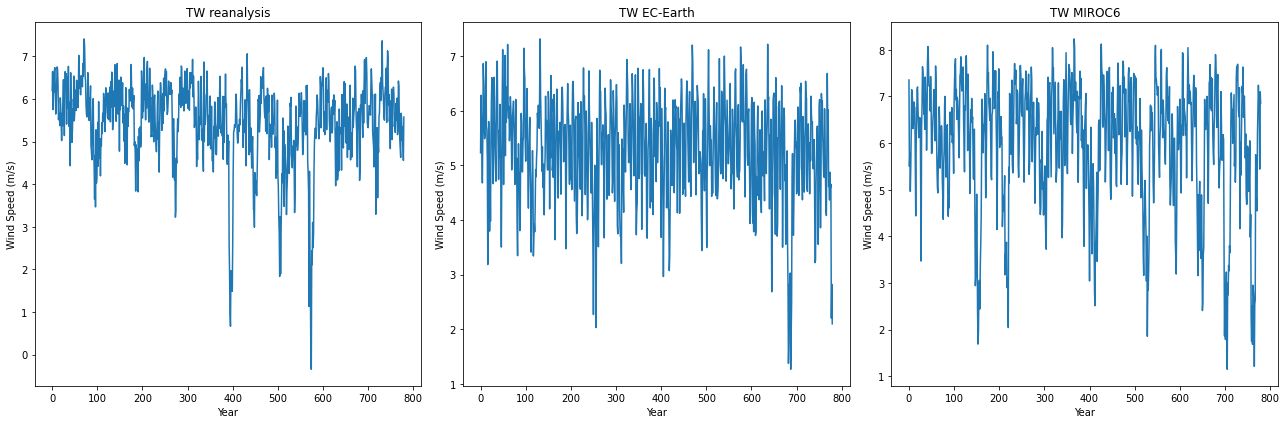

In [442]:
# Generate years as row indicators
start_year = 1950
months = df_tw.shape[0]
years = np.arange(start_year, start_year + months // 12 + 1)

# Create subplots with three plots arranged horizontally
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: TW reanalysis
axs[0].plot(df_tw['TW reanalysis'])
axs[0].set_title('TW reanalysis')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Wind Speed (m/s)')

# Plot 2: TW EC-Earth
axs[1].plot(df_tw['TW EC-Earth'])
axs[1].set_title('TW EC-Earth')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Wind Speed (m/s)')

# Plot 3: TW MIROC6
axs[2].plot(df_tw['TW MIROC6'])
axs[2].set_title('TW MIROC6')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Wind Speed (m/s)')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

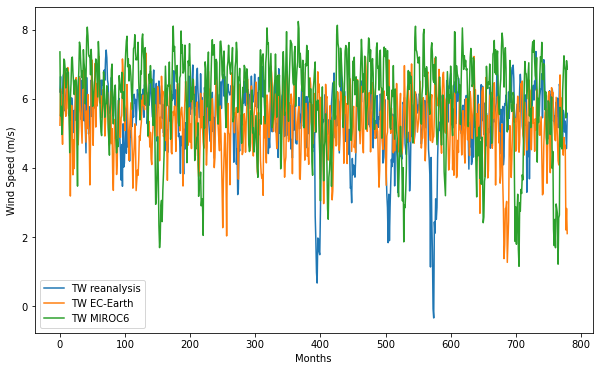

In [443]:
# Plot the dataframe
plt.figure(figsize=(10, 6))

# Line plot with modified x-axis labels
plt.plot(df_tw)

# Add legend
plt.legend(df_tw.columns)

# Set labels for x and y axes
plt.xlabel('Months')
plt.ylabel('Wind Speed (m/s)')

# Show the plot
plt.show()

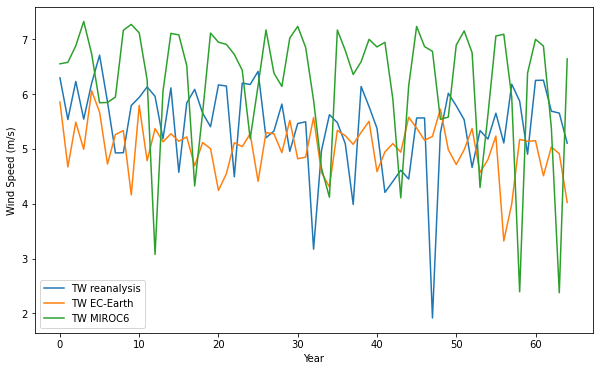

In [444]:
# Plot the dataframe
plt.figure(figsize=(10, 6))

# Line plot with modified x-axis labels
plt.plot(mean_tw)

# Add legend
plt.legend(df_tw.columns)

# Set labels for x and y axes
plt.xlabel('Year')
plt.ylabel('Wind Speed (m/s)')

# Show the plot
plt.show()

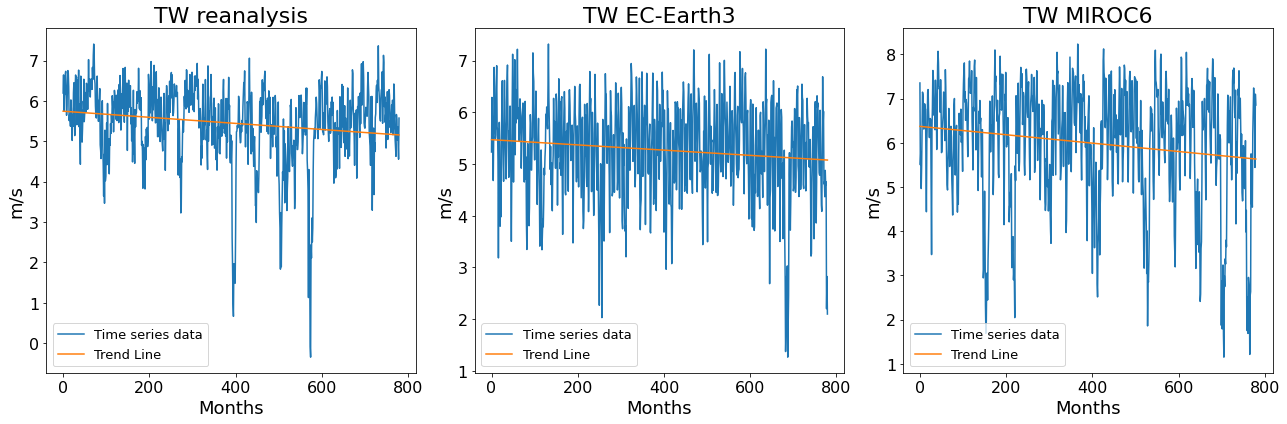

                            OLS Regression Results                            
Dep. Variable:          TW reanalysis   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     23.67
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.38e-06
Time:                        18:40:33   Log-Likelihood:                -1085.2
No. Observations:                 780   AIC:                             2174.
Df Residuals:                     778   BIC:                             2184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       5.7446      0.070     82.445      0.0

In [523]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create the dataframe
data = {
    'Year': range(len(df_tw))
}

df = pd.DataFrame(data)

# Add a constant column for the intercept term
df['constant'] = 1

################## reanalysis ##################
# Perform linear regression
model_reanalysis = sm.OLS(df_tw['TW reanalysis'], df[['constant', 'Year']])
results_reanalysis = model_reanalysis.fit()

# Get the estimated coefficients
intercept_reanalysis = results_reanalysis.params['constant']
slope_reanalysis = results_reanalysis.params['Year']

# Generate the trend line
trend_line_reanalysis = intercept_reanalysis + slope_reanalysis * df['Year']

################## EC-Earth3 ##################
# Perform linear regression
model_ecearth = sm.OLS(df_tw['TW EC-Earth'], df[['constant', 'Year']])
results_ecearth = model_ecearth.fit()

# Get the estimated coefficients
intercept_ecearth = results_ecearth.params['constant']
slope_ecearth = results_ecearth.params['Year']

# Generate the trend line
trend_line_ecearth = intercept_ecearth + slope_ecearth * df['Year']

################## MIROC6 ##################
# Perform linear regression
model_miroc6 = sm.OLS(df_tw['TW MIROC6'], df[['constant', 'Year']])
results_miroc6 = model_miroc6.fit()

# Get the estimated coefficients
intercept_miroc6 = results_miroc6.params['constant']
slope_miroc6 = results_miroc6.params['Year']

# Generate the trend line
trend_line_miroc6 = intercept_miroc6 + slope_miroc6 * df['Year']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: TW reanalysis
axes[0].plot(df['Year'], df_tw['TW reanalysis'], label='Time series data')
axes[0].plot(df['Year'], trend_line_reanalysis, label='Trend Line')
axes[0].set_xlabel('Months', fontsize=18)
axes[0].set_ylabel('m/s', fontsize=18)
axes[0].set_title('TW reanalysis', fontsize=22)
axes[0].legend(prop={'size': 13})
axes[0].tick_params(axis='both', labelsize=16)

# Plot 2: TW EC-Earth
axes[1].plot(df['Year'], df_tw['TW EC-Earth'], label='Time series data')
axes[1].plot(df['Year'], trend_line_ecearth, label='Trend Line')
axes[1].set_xlabel('Months', fontsize=18)
axes[1].set_ylabel('m/s', fontsize=18)
axes[1].set_title('TW EC-Earth3', fontsize=22)
axes[1].legend(prop={'size': 13})
axes[1].tick_params(axis='both', labelsize=16)

# Plot 3: TW MIROC6
axes[2].plot(df['Year'], df_tw['TW MIROC6'], label='Time series data')
axes[2].plot(df['Year'], trend_line_miroc6, label='Trend Line')
axes[2].set_xlabel('Months', fontsize=18)
axes[2].set_ylabel('m/s', fontsize=18)
axes[2].set_title('TW MIROC6', fontsize=22)
axes[2].legend(prop={'size': 13})
axes[2].tick_params(axis='both', labelsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


print(results_reanalysis.summary())
print(results_ecearth.summary())
print(results_miroc6.summary())



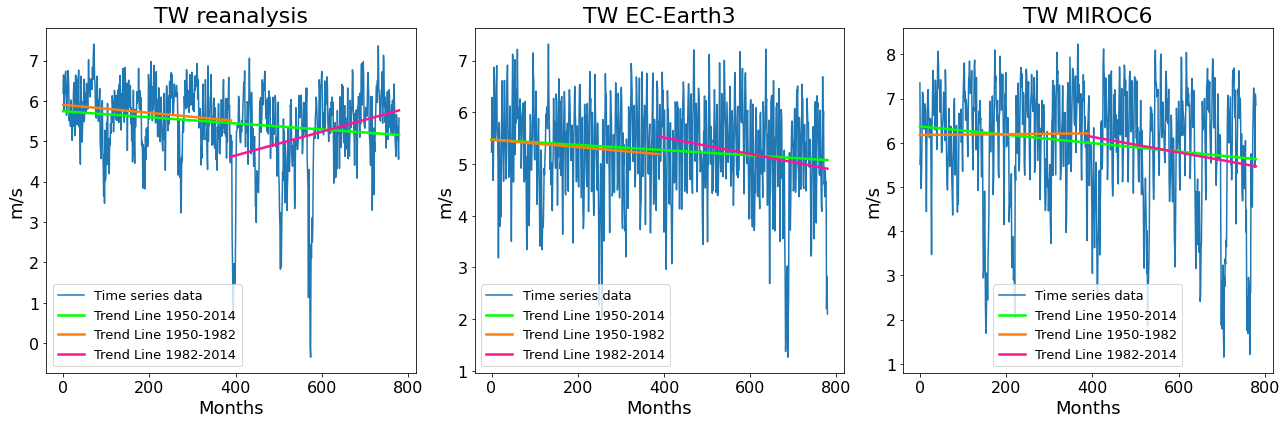

                            OLS Regression Results                            
Dep. Variable:          TW reanalysis   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     10.04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):            0.00165
Time:                        19:32:31   Log-Likelihood:                -411.61
No. Observations:                 390   AIC:                             827.2
Df Residuals:                     388   BIC:                             835.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       5.9035      0.070     83.793      0.0

In [526]:
# Create the dataframe
data = {
    'Year': range(len(df_EPAC))
}

df = pd.DataFrame(data)

# Add a constant column for the intercept term
df['constant'] = 1

# Split the time series in half
split_index = len(df) // 2
df_first_half = df[:split_index]
df_second_half = df[split_index:]

# Perform linear regression for the first half - Reanalysis
model_reanalysis_first = sm.OLS(df_tw['TW reanalysis'][:split_index], df_first_half[['constant', 'Year']])
results_reanalysis_first = model_reanalysis_first.fit()

# Get the estimated coefficients for the first half - Reanalysis
intercept_reanalysis_first = results_reanalysis_first.params['constant']
slope_reanalysis_first = results_reanalysis_first.params['Year']

# Generate the trend line for the first half - Reanalysis
trend_line_reanalysis_first = intercept_reanalysis_first + slope_reanalysis_first * df_first_half['Year']

# Perform linear regression for the second half - Reanalysis
model_reanalysis_second = sm.OLS(df_tw['TW reanalysis'][split_index:], df_second_half[['constant', 'Year']])
results_reanalysis_second = model_reanalysis_second.fit()

# Get the estimated coefficients for the second half - Reanalysis
intercept_reanalysis_second = results_reanalysis_second.params['constant']
slope_reanalysis_second = results_reanalysis_second.params['Year']

# Generate the trend line for the second half - Reanalysis
trend_line_reanalysis_second = intercept_reanalysis_second + slope_reanalysis_second * df_second_half['Year']

# Perform linear regression for the first half - EC-Earth3
model_ecearth_first = sm.OLS(df_tw['TW EC-Earth'][:split_index], df_first_half[['constant', 'Year']])
results_ecearth_first = model_ecearth_first.fit()

# Get the estimated coefficients for the first half - EC-Earth3
intercept_ecearth_first = results_ecearth_first.params['constant']
slope_ecearth_first = results_ecearth_first.params['Year']

# Generate the trend line for the first half - EC-Earth3
trend_line_ecearth_first = intercept_ecearth_first + slope_ecearth_first * df_first_half['Year']

# Perform linear regression for the second half - EC-Earth3
model_ecearth_second = sm.OLS(df_tw['TW EC-Earth'][split_index:], df_second_half[['constant', 'Year']])
results_ecearth_second = model_ecearth_second.fit()

# Get the estimated coefficients for the second half - EC-Earth3
intercept_ecearth_second = results_ecearth_second.params['constant']
slope_ecearth_second = results_ecearth_second.params['Year']

# Generate the trend line for the second half - EC-Earth3
trend_line_ecearth_second = intercept_ecearth_second + slope_ecearth_second * df_second_half['Year']

# Perform linear regression for the first half - MIROC6
model_miroc6_first = sm.OLS(df_tw['TW MIROC6'][:split_index], df_first_half[['constant', 'Year']])
results_miroc6_first = model_miroc6_first.fit()

# Get the estimated coefficients for the first half - MIROC6
intercept_miroc6_first = results_miroc6_first.params['constant']
slope_miroc6_first = results_miroc6_first.params['Year']

# Generate the trend line for the first half - MIROC6
trend_line_miroc6_first = intercept_miroc6_first + slope_miroc6_first * df_first_half['Year']

# Perform linear regression for the second half - MIROC6
model_miroc6_second = sm.OLS(df_tw['TW MIROC6'][split_index:], df_second_half[['constant', 'Year']])
results_miroc6_second = model_miroc6_second.fit()

# Get the estimated coefficients for the second half - MIROC6
intercept_miroc6_second = results_miroc6_second.params['constant']
slope_miroc6_second = results_miroc6_second.params['Year']

# Generate the trend line for the second half - MIROC6
trend_line_miroc6_second = intercept_miroc6_second + slope_miroc6_second * df_second_half['Year']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: TW reanalysis
axes[0].plot(df['Year'], df_tw['TW reanalysis'], label='Time series data')
axes[0].plot(df['Year'], trend_line_reanalysis, color = 'lime', label='Trend Line 1950-2014', linewidth=2.5)
axes[0].plot(df_first_half['Year'], trend_line_reanalysis_first, label='Trend Line 1950-1982', linewidth=2.5)
axes[0].plot(df_second_half['Year'], trend_line_reanalysis_second,color = 'deeppink', label='Trend Line 1982-2014', linewidth=2.5)
axes[0].set_xlabel('Months', fontsize=18)
axes[0].set_ylabel('m/s', fontsize=18)
axes[0].set_title('TW reanalysis', fontsize=22)
axes[0].legend(prop={'size': 13})
axes[0].tick_params(axis='both', labelsize=16)

# Plot 2: TW EC-Earth
axes[1].plot(df['Year'], df_tw['TW EC-Earth'], label='Time series data')
axes[1].plot(df['Year'], trend_line_ecearth, color = 'lime', label='Trend Line 1950-2014',linewidth=2.5)
axes[1].plot(df_first_half['Year'], trend_line_ecearth_first, label='Trend Line 1950-1982', linewidth=2.5)
axes[1].plot(df_second_half['Year'], trend_line_ecearth_second, color = 'deeppink',label='Trend Line 1982-2014', linewidth=2.5)
axes[1].set_xlabel('Months', fontsize=18)
axes[1].set_ylabel('m/s', fontsize=18)
axes[1].set_title('TW EC-Earth3', fontsize=22)
axes[1].legend(prop={'size': 13})
axes[1].tick_params(axis='both', labelsize=16)

# Plot 3: TW MIROC6
axes[2].plot(df['Year'], df_tw['TW MIROC6'], label='Time series data')
axes[2].plot(df['Year'], trend_line_miroc6, color = 'lime', label='Trend Line 1950-2014', linewidth=2.5)
axes[2].plot(df_first_half['Year'], trend_line_miroc6_first, label='Trend Line 1950-1982', linewidth=2.5)
axes[2].plot(df_second_half['Year'], trend_line_miroc6_second, color = 'deeppink',label='Trend Line 1982-2014', linewidth=2.5)
axes[2].set_xlabel('Months', fontsize=18)
axes[2].set_ylabel('m/s', fontsize=18)
axes[2].set_title('TW MIROC6', fontsize=22)
axes[2].legend(prop={'size': 13})
axes[2].tick_params(axis='both', labelsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

print(results_reanalysis_first.summary())
print(results_ecearth_first.summary())
print(results_miroc6_first.summary())

print(results_reanalysis_second.summary())
print(results_ecearth_second.summary())
print(results_miroc6_second.summary())

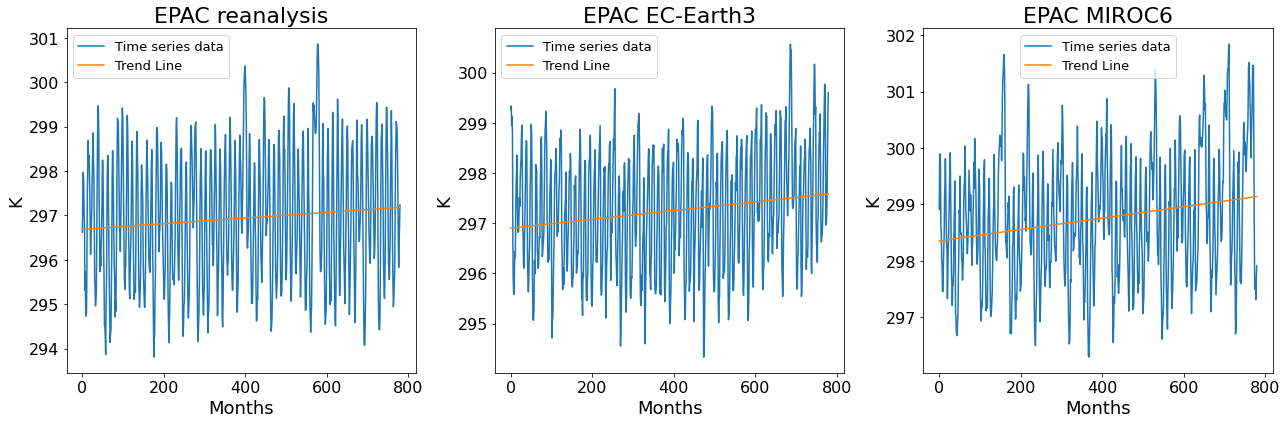

                            OLS Regression Results                            
Dep. Variable:        EPAC reanalysis   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.246
Date:                Sun, 25 Jun 2023   Prob (F-statistic):            0.00726
Time:                        10:31:51   Log-Likelihood:                -1412.8
No. Observations:                 780   AIC:                             2830.
Df Residuals:                     778   BIC:                             2839.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     296.6872      0.106   2797.560      0.0

In [512]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create the dataframe
data = {
    'Year': range(len(df_EPAC))
}

df = pd.DataFrame(data)

# Add a constant column for the intercept term
df['constant'] = 1

################## reanalysis ##################
# Perform linear regression
model_reanalysis = sm.OLS(df_EPAC['EPAC reanalysis'], df[['constant', 'Year']])
results_reanalysis = model_reanalysis.fit()

# Get the estimated coefficients
intercept_reanalysis = results_reanalysis.params['constant']
slope_reanalysis = results_reanalysis.params['Year']

# Generate the trend line
trend_line_reanalysis = intercept_reanalysis + slope_reanalysis * df['Year']

################## EC-Earth3 ##################
# Perform linear regression
model_ecearth = sm.OLS(df_EPAC['EPAC EC-Earth'], df[['constant', 'Year']])
results_ecearth = model_ecearth.fit()

# Get the estimated coefficients
intercept_ecearth = results_ecearth.params['constant']
slope_ecearth = results_ecearth.params['Year']

# Generate the trend line
trend_line_ecearth = intercept_ecearth + slope_ecearth * df['Year']

################## MIROC6 ##################
# Perform linear regression
model_miroc6 = sm.OLS(df_EPAC['EPAC MIROC6'], df[['constant', 'Year']])
results_miroc6 = model_miroc6.fit()

# Get the estimated coefficients
intercept_miroc6 = results_miroc6.params['constant']
slope_miroc6 = results_miroc6.params['Year']

# Generate the trend line
trend_line_miroc6 = intercept_miroc6 + slope_miroc6 * df['Year']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: TW reanalysis
axes[0].plot(df['Year'], df_EPAC['EPAC reanalysis'], label='Time series data')
axes[0].plot(df['Year'], trend_line_reanalysis, label='Trend Line')
axes[0].set_xlabel('Months', fontsize=18)
axes[0].set_ylabel('K', fontsize=18)
axes[0].set_title('EPAC reanalysis', fontsize=22)
axes[0].legend(prop={'size': 13})
axes[0].tick_params(axis='both', labelsize=16)

# Plot 2: TW EC-Earth
axes[1].plot(df['Year'], df_EPAC['EPAC EC-Earth'], label='Time series data')
axes[1].plot(df['Year'], trend_line_ecearth, label='Trend Line')
axes[1].set_xlabel('Months', fontsize=18)
axes[1].set_ylabel('K', fontsize=18)
axes[1].set_title('EPAC EC-Earth3', fontsize=22)
axes[1].legend(prop={'size': 13})
axes[1].tick_params(axis='both', labelsize=16)

# Plot 3: TW MIROC6
axes[2].plot(df['Year'], df_EPAC['EPAC MIROC6'], label='Time series data')
axes[2].plot(df['Year'], trend_line_miroc6, label='Trend Line')
axes[2].set_xlabel('Months', fontsize=18)
axes[2].set_ylabel('K', fontsize=18)
axes[2].set_title('EPAC MIROC6', fontsize=22)
axes[2].legend(prop={'size': 13})
axes[2].tick_params(axis='both', labelsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


print(results_reanalysis.summary())
print(results_ecearth.summary())
print(results_miroc6.summary())



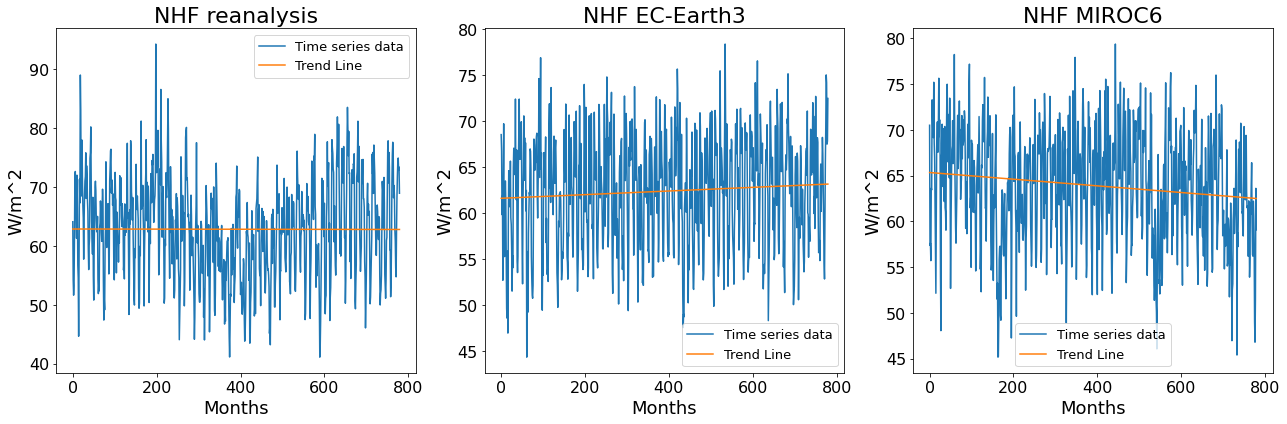

                            OLS Regression Results                            
Dep. Variable:         NHF reanalysis   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.005232
Date:                Thu, 29 Jun 2023   Prob (F-statistic):              0.942
Time:                        16:59:58   Log-Likelihood:                -2778.9
No. Observations:                 780   AIC:                             5562.
Df Residuals:                     778   BIC:                             5571.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      62.8832      0.611    102.896      0.0

In [518]:
df_NHF

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create the dataframe
data = {
    'Year': range(len(df_EPAC))
}

df = pd.DataFrame(data)

# Add a constant column for the intercept term
df['constant'] = 1

################## reanalysis ##################
# Perform linear regression
model_reanalysis = sm.OLS(df_NHF['NHF reanalysis'], df[['constant', 'Year']])
results_reanalysis = model_reanalysis.fit()

# Get the estimated coefficients
intercept_reanalysis = results_reanalysis.params['constant']
slope_reanalysis = results_reanalysis.params['Year']

# Generate the trend line
trend_line_reanalysis = intercept_reanalysis + slope_reanalysis * df['Year']

################## EC-Earth3 ##################
# Perform linear regression
model_ecearth = sm.OLS(df_NHF['NHF EC-Earth'], df[['constant', 'Year']])
results_ecearth = model_ecearth.fit()

# Get the estimated coefficients
intercept_ecearth = results_ecearth.params['constant']
slope_ecearth = results_ecearth.params['Year']

# Generate the trend line
trend_line_ecearth = intercept_ecearth + slope_ecearth * df['Year']

################## MIROC6 ##################
# Perform linear regression
model_miroc6 = sm.OLS(df_NHF['NHF MIROC6'], df[['constant', 'Year']])
results_miroc6 = model_miroc6.fit()

# Get the estimated coefficients
intercept_miroc6 = results_miroc6.params['constant']
slope_miroc6 = results_miroc6.params['Year']

# Generate the trend line
trend_line_miroc6 = intercept_miroc6 + slope_miroc6 * df['Year']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


# Plot 1: TW reanalysis
axes[0].plot(df['Year'], df_NHF['NHF reanalysis'], label='Time series data')
axes[0].plot(df['Year'], trend_line_reanalysis, label='Trend Line')
axes[0].set_xlabel('Months', fontsize=18)
axes[0].set_ylabel('W/m^2', fontsize=18)
axes[0].set_title('NHF reanalysis', fontsize=22)
axes[0].legend(prop={'size': 13})
axes[0].tick_params(axis='both', labelsize=16)

# Plot 2: TW EC-Earth
axes[1].plot(df['Year'], df_NHF['NHF EC-Earth'], label='Time series data')
axes[1].plot(df['Year'], trend_line_ecearth, label='Trend Line')
axes[1].set_xlabel('Months', fontsize=18)
axes[1].set_ylabel('W/m^2', fontsize=18)
axes[1].set_title('NHF EC-Earth3', fontsize=22)
axes[1].legend(prop={'size': 13})
axes[1].tick_params(axis='both', labelsize=16)

# Plot 3: TW MIROC6
axes[2].plot(df['Year'], df_NHF['NHF MIROC6'], label='Time series data')
axes[2].plot(df['Year'], trend_line_miroc6, label='Trend Line')
axes[2].set_xlabel('Months', fontsize=18)
axes[2].set_ylabel('W/m^2', fontsize=18)
axes[2].set_title('NHF MIROC6',fontsize=22)
axes[2].legend(prop={'size': 13})
axes[2].tick_params(axis='both', labelsize=16)


# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


print(results_reanalysis.summary())
print(results_ecearth.summary())
print(results_miroc6.summary())



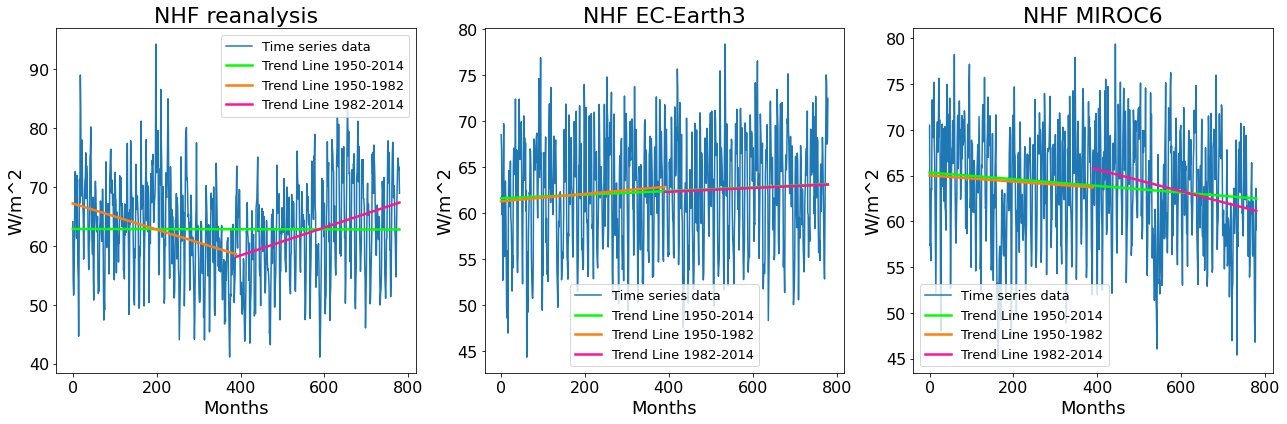

                            OLS Regression Results                            
Dep. Variable:         NHF reanalysis   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     37.17
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.61e-09
Time:                        17:04:20   Log-Likelihood:                -1367.1
No. Observations:                 390   AIC:                             2738.
Df Residuals:                     388   BIC:                             2746.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      67.2291      0.816     82.350      0.0

In [522]:
# Create the dataframe
data = {
    'Year': range(len(df_EPAC))
}

df = pd.DataFrame(data)

# Add a constant column for the intercept term
df['constant'] = 1

# Split the time series in half
split_index = len(df) // 2
df_first_half = df[:split_index]
df_second_half = df[split_index:]

################## reanalysis ##################
# Perform linear regression on the first half
model_reanalysis_first = sm.OLS(df_NHF['NHF reanalysis'][:split_index], df_first_half[['constant', 'Year']])
results_reanalysis_first = model_reanalysis_first.fit()

# Get the estimated coefficients for the first half
intercept_reanalysis_first = results_reanalysis_first.params['constant']
slope_reanalysis_first = results_reanalysis_first.params['Year']

# Generate the trend line for the first half
trend_line_reanalysis_first = intercept_reanalysis_first + slope_reanalysis_first * df_first_half['Year']

# Perform linear regression on the second half
model_reanalysis_second = sm.OLS(df_NHF['NHF reanalysis'][split_index:], df_second_half[['constant', 'Year']])
results_reanalysis_second = model_reanalysis_second.fit()

# Get the estimated coefficients for the second half
intercept_reanalysis_second = results_reanalysis_second.params['constant']
slope_reanalysis_second = results_reanalysis_second.params['Year']

# Generate the trend line for the second half
trend_line_reanalysis_second = intercept_reanalysis_second + slope_reanalysis_second * df_second_half['Year']

################## EC-Earth3 ##################
# Perform linear regression on the first half
model_ecearth_first = sm.OLS(df_NHF['NHF EC-Earth'][:split_index], df_first_half[['constant', 'Year']])
results_ecearth_first = model_ecearth_first.fit()

# Get the estimated coefficients for the first half
intercept_ecearth_first = results_ecearth_first.params['constant']
slope_ecearth_first = results_ecearth_first.params['Year']

# Generate the trend line for the first half
trend_line_ecearth_first = intercept_ecearth_first + slope_ecearth_first * df_first_half['Year']

# Perform linear regression on the second half
model_ecearth_second = sm.OLS(df_NHF['NHF EC-Earth'][split_index:], df_second_half[['constant', 'Year']])
results_ecearth_second = model_ecearth_second.fit()

# Get the estimated coefficients for the second half
intercept_ecearth_second = results_ecearth_second.params['constant']
slope_ecearth_second = results_ecearth_second.params['Year']

# Generate the trend line for the second half
trend_line_ecearth_second = intercept_ecearth_second + slope_ecearth_second * df_second_half['Year']

################## MIROC6 ##################
# Perform linear regression on the first half
model_miroc6_first = sm.OLS(df_NHF['NHF MIROC6'][:split_index], df_first_half[['constant', 'Year']])
results_miroc6_first = model_miroc6_first.fit()

# Get the estimated coefficients for the first half
intercept_miroc6_first = results_miroc6_first.params['constant']
slope_miroc6_first = results_miroc6_first.params['Year']

# Generate the trend line for the first half
trend_line_miroc6_first = intercept_miroc6_first + slope_miroc6_first * df_first_half['Year']

# Perform linear regression on the second half
model_miroc6_second = sm.OLS(df_NHF['NHF MIROC6'][split_index:], df_second_half[['constant', 'Year']])
results_miroc6_second = model_miroc6_second.fit()

# Get the estimated coefficients for the second half
intercept_miroc6_second = results_miroc6_second.params['constant']
slope_miroc6_second = results_miroc6_second.params['Year']

# Generate the trend line for the second half
trend_line_miroc6_second = intercept_miroc6_second + slope_miroc6_second * df_second_half['Year']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: TW reanalysis
axes[0].plot(df['Year'], df_NHF['NHF reanalysis'], label='Time series data')
axes[0].plot(df['Year'], trend_line_reanalysis, color = 'lime' , label='Trend Line 1950-2014', linewidth=2.5)
axes[0].plot(df_first_half['Year'], trend_line_reanalysis_first, label='Trend Line 1950-1982', linewidth=2.5)
axes[0].plot(df_second_half['Year'], trend_line_reanalysis_second,color = 'deeppink', label='Trend Line 1982-2014', linewidth=2.5)
axes[0].set_xlabel('Months', fontsize=18)
axes[0].set_ylabel('W/m^2', fontsize=18)
axes[0].set_title('NHF reanalysis', fontsize=22)
axes[0].legend(prop={'size': 13})
axes[0].tick_params(axis='both', labelsize=16)

# Plot 2: TW EC-Earth
axes[1].plot(df['Year'], df_NHF['NHF EC-Earth'], label='Time series data')
axes[1].plot(df['Year'], trend_line_ecearth, color = 'lime' , label='Trend Line 1950-2014', linewidth=2.5)
axes[1].plot(df_first_half['Year'], trend_line_ecearth_first, label='Trend Line 1950-1982', linewidth=2.5)
axes[1].plot(df_second_half['Year'], trend_line_ecearth_second,color = 'deeppink', label='Trend Line 1982-2014', linewidth=2.5)
axes[1].set_xlabel('Months', fontsize=18)
axes[1].set_ylabel('W/m^2', fontsize=18)
axes[1].set_title('NHF EC-Earth3', fontsize=22)
axes[1].legend(prop={'size': 13})
axes[1].tick_params(axis='both', labelsize=16)

# Plot 3: TW MIROC6
axes[2].plot(df['Year'], df_NHF['NHF MIROC6'], label='Time series data')
axes[2].plot(df['Year'], trend_line_miroc6, color = 'lime' , label='Trend Line 1950-2014', linewidth=2.5)
axes[2].plot(df_first_half['Year'], trend_line_miroc6_first, label='Trend Line 1950-1982', linewidth=2.5)
axes[2].plot(df_second_half['Year'], trend_line_miroc6_second, color = 'deeppink', label='Trend Line 1982-2014', linewidth=2.5)
axes[2].set_xlabel('Months', fontsize=18)
axes[2].set_ylabel('W/m^2', fontsize=18)
axes[2].set_title('NHF MIROC6',fontsize=22)
axes[2].legend(prop={'size': 13})
axes[2].tick_params(axis='both', labelsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


print(results_reanalysis_first.summary())
print(results_ecearth_first.summary())
print(results_miroc6_first.summary())

print(results_reanalysis_second.summary())
print(results_ecearth_second.summary())
print(results_miroc6_second.summary())

# SEASONALITY RESULTS

In [492]:
import pkg_resources

for package in pkg_resources.working_set:
    print(f"{package.key}=={package.version}")

diff-match-patch==20200713
regex==2022.3.15
dask==2022.2.1
distributed==2022.2.1
fsspec==2022.2.0
scikit-learn-intelex==2021.20220215.132722
certifi==2021.10.8
imagecodecs==2021.8.26
tifffile==2021.7.2
daal4py==2021.5.0
pytz==2021.3
setuptools==61.2.0
keyring==23.4.0
conda==22.9.0
pyzmq==22.3.0
twisted==22.2.0
attrs==21.4.0
incremental==21.3.0
argon2-cffi==21.3.0
packaging==21.3
pip==21.2.4
argon2-cffi-bindings==21.2.0
hyperlink==21.0.0
pyopenssl==21.0.0
automat==20.2.0
black==19.10b0
service-identity==18.1.0
constantly==15.1.0
pillow==9.0.1
ipython==8.2.0
click==8.0.4
tenacity==8.0.1
pycurl==7.44.1
ipywidgets==7.6.5
pytest==7.1.1
ipykernel==6.9.1
notebook==6.4.8
nbconvert==6.4.4
jupyter-console==6.4.0
jupyter-client==6.1.12
pydocstyle==6.1.1
tornado==6.1
pyyaml==6.0
isort==5.9.3
psutil==5.8.0
plotly==5.6.0
zope.interface==5.4.0
arch==5.3.1
qtconsole==5.3.0
nbformat==5.3.0
tigramite==5.2.0.2
multidict==5.2.0
spyder==5.1.5
decorator==5.1.1
traitlets==5.1.1
smart-open==5.1.0
ujson==5.1.0

In [498]:
from arch.unitroot import PhillipsPerron
from scipy import stats

def test_norm_stat(GFDL_data):

    # Variable names used throughout
    var_names = ['WPAC', 'CPAC', 'EPAC', 'TW', 'NHF']

    # make data frame of data
    df_GFDL = pd.DataFrame(GFDL_data, columns=var_names)
    dataframe_GFDL = pp.DataFrame(GFDL_data, 
                                 datatime = np.arange(len(GFDL_data)), 
                                 var_names=var_names)

    cpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['CPAC'], show_plot = False)
    epac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['EPAC'], show_plot = False)
    wpac_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['WPAC'], show_plot = False)
    tw_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['TW'], show_plot = False)
    nhf_detrend_GFDL = deTrend_deSeasonalize(df_GFDL['NHF'], show_plot = False)
        
    df_GFDL_processed = pd.DataFrame({'WPAC': wpac_detrend_GFDL, 
                                        'CPAC': cpac_detrend_GFDL, 
                                        'EPAC': epac_detrend_GFDL,
                                        'TW': tw_detrend_GFDL,
                                        'NHF': nhf_detrend_GFDL})
        
    print('p-value PhillipsPerron test wpac:', PhillipsPerron(wpac_detrend_GFDL).pvalue)
    print('p-value PhillipsPerron test cpac:', PhillipsPerron(cpac_detrend_GFDL).pvalue)
    print('p-value PhillipsPerron test epac:', PhillipsPerron(epac_detrend_GFDL).pvalue)
    print('p-value PhillipsPerron test tw:', PhillipsPerron(tw_detrend_GFDL).pvalue)
    print('p-value PhillipsPerron test nhf:', PhillipsPerron(nhf_detrend_GFDL).pvalue)
        
    print('p-value Shapiro-Wilk test wpac:', stats.shapiro(wpac_detrend_GFDL).pvalue)
    print('p-value Shapiro-Wilk test cpac:', stats.shapiro(cpac_detrend_GFDL).pvalue)
    print('p-value Shapiro-Wilk test epac:', stats.shapiro(epac_detrend_GFDL).pvalue)
    print('p-value Shapiro-Wilk test tw:', stats.shapiro(tw_detrend_GFDL).pvalue)
    print('p-value Shapiro-Wilk test nhf:', stats.shapiro(nhf_detrend_GFDL).pvalue)

In [500]:
test_norm_stat(ECearth_data_final)

p-value PhillipsPerron test wpac: 0.0
p-value PhillipsPerron test cpac: 8.060312584958016e-07
p-value PhillipsPerron test epac: 1.3268555491007169e-12
p-value PhillipsPerron test tw: 4.5214300858171624e-29
p-value PhillipsPerron test nhf: 3.252720201947278e-30
p-value Shapiro-Wilk test wpac: 3.0191858128164606e-12
p-value Shapiro-Wilk test cpac: 0.0023263690527528524
p-value Shapiro-Wilk test epac: 1.5094200534804258e-05
p-value Shapiro-Wilk test tw: 1.747042612216074e-20
p-value Shapiro-Wilk test nhf: 7.232645202748245e-07


# EXTRA MODEL TESTS VOOR PAPER

# GFDL MODEL

In [49]:
GFDL_nc_names = ['psl_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_19500116-20141216_v20190726.nc',
             'tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_19500116-20141216_v20190726.nc',
             'Etas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_19500116-20141216_v20190726.nc',
             'uas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_19500116-20141216_v20190726.nc',
             'hfls_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_19500116-20141216_v20190726.nc',
             'hfss_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_19500116-20141216_v20190726.nc']

GFDL_csv_names = ['mean_WPAC_GFDL',
                   'mean_CPAC_GFDL',
                   'mean_EPAC_GFDL',
                   'mean_ZWS_GFDL',
                   'mean_LHF_GFDL',
                   'mean_SHF_GFDL'
                  ]

GFDL_var_names = ['psl',
            'tas',
            'tas',
            'uas',
            'hfls',
            'hfss']

GFDL_data = []

for i in range(len(GFDL_nc_names)):
    if i ==0:
        gfdl_data = ncfiles_to_series(GFDL_nc_names[i],GFDL_csv_names[i], GFDL_var_names[i], 'GFDL-ESM4')
    else:
        more_data = ncfiles_to_series(GFDL_nc_names[i], GFDL_csv_names[i], GFDL_var_names[i], 'GFDL-ESM4')
        gfdl_data = np.vstack((gfdl_data, more_data)) 

C:\Users\esz320\AppData\Local\Temp\ipykernel_18888\2648464128.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array.append(var[i])
C:\Users\esz320\AppData\Local\Temp\ipykernel_18888\2648464128.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array.append(var[i])
C:\Users\esz320\AppData\Local\Temp\ipykernel_18888\2648464128.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array.append(var[i])
C:\Users\esz320\AppData\Loca

In [50]:
GFDL_data = gfdl_data

last_two_mean = np.mean(GFDL_data[-2:, :], axis=0)
GFDL_data = gfdl_data[:-2, :]
GFDL_data[3, :] *= -1

GFDL_data_final = np.vstack((GFDL_data, last_two_mean))
GFDL_data_final = GFDL_data_final.T

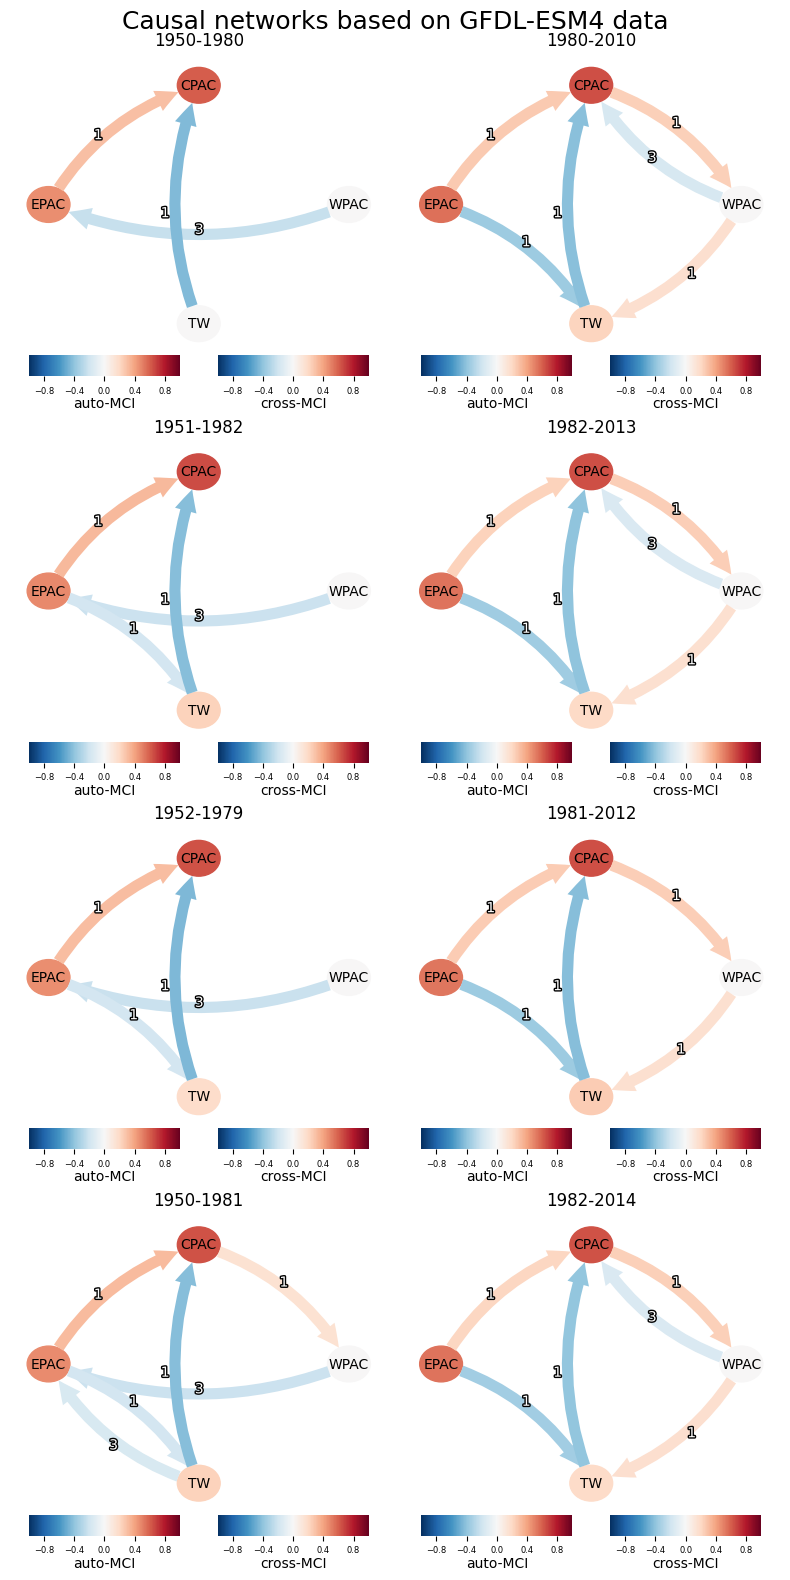

In [51]:
GFDL_1vroeg, GFDL_2vroeg, GFDL_3vroeg, GFDL_4vroeg, GFDL_1laat, GFDL_2laat, GFDL_3laat, GFDL_4laat = link_robustness(GFDL_data_final, parcorr, extended = 1, model = 'GFDL-ESM4')
var_names = ['WPAC', 'CPAC', 'EPAC', 'TW']

# HadGEM3-GC31-LL MODEL

In [10]:
HadGEM3_nc_names = ['psl_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_19500116-20141216_v20190624.nc',
             'Ctas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_19500116-20141216_v20190624.nc',
             'tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_19500116-20141216_v20190624.nc',
             'uas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_19500116-20141216_v20190624.nc',
             'hfls_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_19500116-20141216_v20190624.nc',
             'hfss_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_19500116-20141216_v20190624.nc']

HadGEM3_csv_names = ['mean_WPAC_HadGEM3',
                   'mean_CPAC_HadGEM3',
                   'mean_EPAC_HadGEM3',
                   'mean_ZWS_HadGEM3',
                   'mean_LHF_HadGEM3',
                   'mean_SHF_HadGEM3'
                  ]

HadGEM3_var_names = ['psl',
            'tas',
            'tas',
            'uas',
            'hfls',
            'hfss']

HadGEM3_data = []

for i in range(len(HadGEM3_nc_names)):
    if i ==0:
        hadgem3_data = ncfiles_to_series(HadGEM3_nc_names[i],HadGEM3_csv_names[i], HadGEM3_var_names[i], 'HadGEM3-GC31-LL')
    else:
        more_data = ncfiles_to_series(HadGEM3_nc_names[i], HadGEM3_csv_names[i], HadGEM3_var_names[i], 'HadGEM3-GC31-LL')
        hadgem3_data = np.vstack((hadgem3_data, more_data)) 

C:\Users\esz320\AppData\Local\Temp\ipykernel_18988\2648464128.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array.append(var[i])
C:\Users\esz320\AppData\Local\Temp\ipykernel_18988\2648464128.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array.append(var[i])
C:\Users\esz320\AppData\Local\Temp\ipykernel_18988\2648464128.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array.append(var[i])
C:\Users\esz320\AppData\Loca

In [11]:
HadGEM3_data = hadgem3_data

last_two_mean = np.mean(HadGEM3_data[-2:, :], axis=0)
HadGEM3_data = hadgem3_data[:-2, :]
HadGEM3_data[3, :] *= -1

HadGEM3_data_final = np.vstack((HadGEM3_data, last_two_mean))
HadGEM3_data_final = HadGEM3_data_final.T

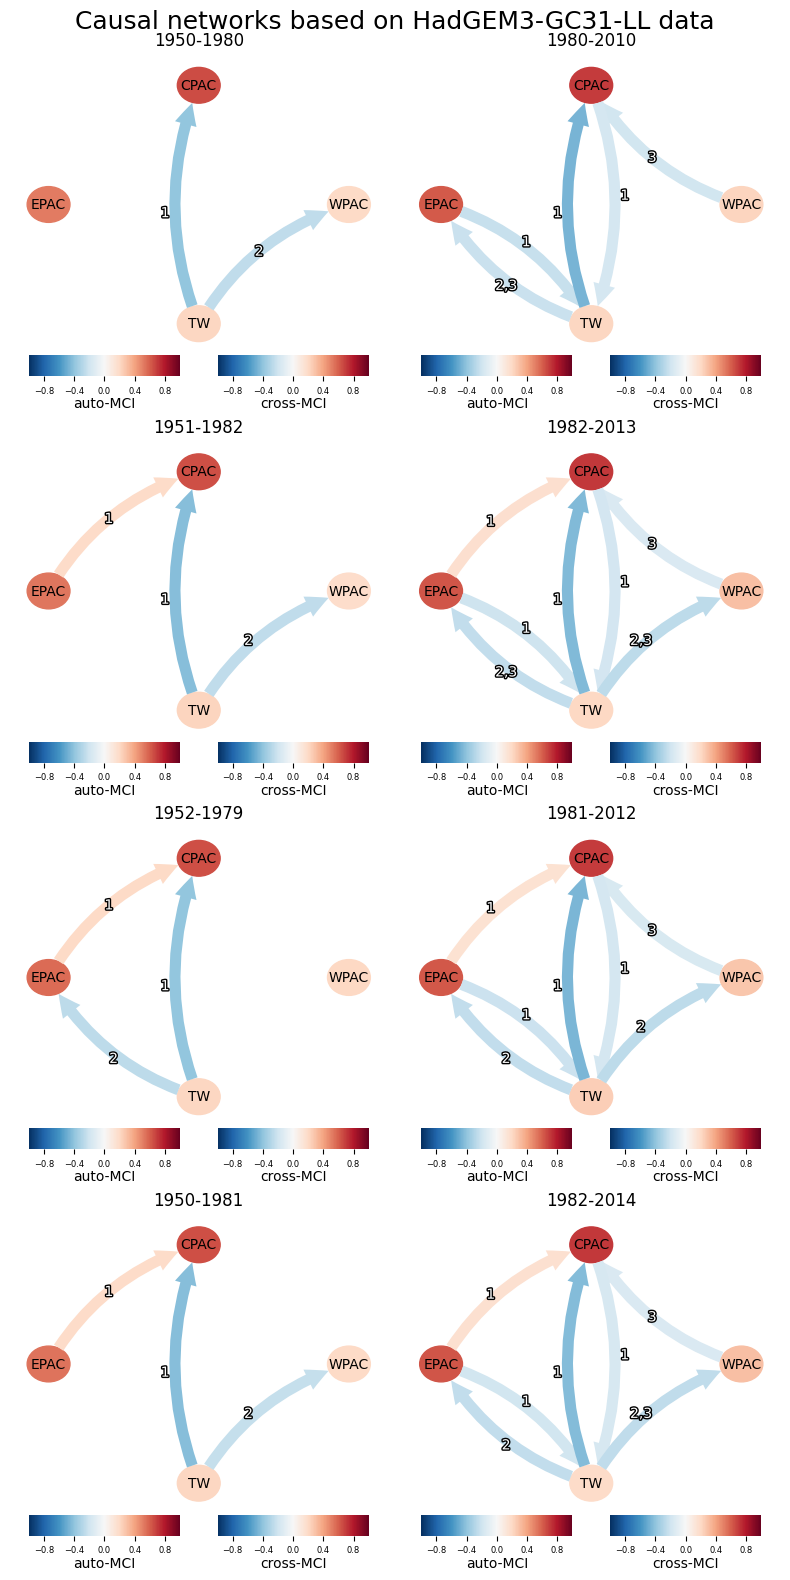

In [14]:
HadGEM3_1vroeg, HadGEM3_2vroeg, HadGEM3_3vroeg, HadGEM3_4vroeg, HadGEM3_1laat, HadGEM3_2laat, HadGEM3_3laat, HadGEM3_4laat = link_robustness(HadGEM3_data_final, parcorr, extended = 1, model = 'HadGEM3-GC31-LL')
var_names = ['WPAC', 'CPAC', 'EPAC', 'TW']

# Function that outputs the 'robust' graph

In [38]:
def robust_links_identifier(list_of_test_results, arrow_presence_int):

    # get graphs from test results list
    graph_list = []
    for result in list_of_test_results:
        graph_list.append(result['graph'])
    
    # convert the '-->' entries to boolean values
    bool_arrays = [(arr == '-->') for arr in graph_list]
    
    # sum all values of the bool arrays to see what entries have more than arrow_presence_int '-->'
    sum_bool_arrays = np.sum(bool_arrays, axis = 0)
    
    # make new array where we place a '-->' if more than arrow_presence_int entry in sum_bool_arrays
    new_graph = np.where(sum_bool_arrays >= arrow_presence_int, '-->', '')
    
    return new_graph


In [46]:
list_of_test_results = HadGEM3_1vroeg, HadGEM3_2vroeg, HadGEM3_3vroeg, HadGEM3_4vroeg
new_graph = robust_links_identifier(list_of_test_results, 3)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

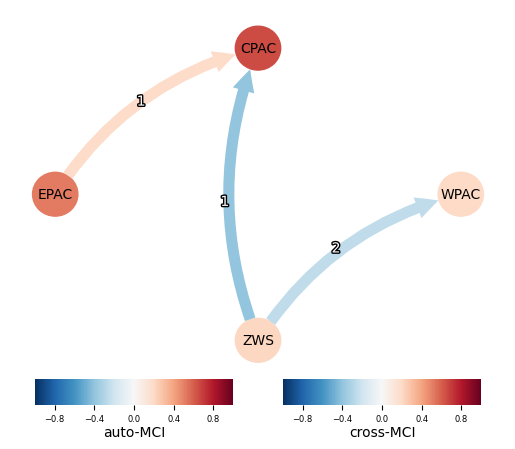

In [47]:
var_names = ['WPAC', 'CPAC', 'EPAC', 'ZWS']
tp.plot_graph(
            val_matrix=HadGEM3_1vroeg['val_matrix'],
            graph=new_graph,
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI')

(<Figure size 640x480 with 1 Axes>, <Axes: >)

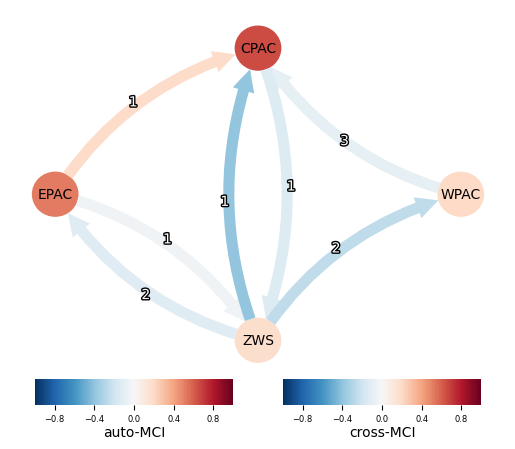

In [48]:
list_of_test_results = HadGEM3_1laat, HadGEM3_2laat, HadGEM3_3laat, HadGEM3_4laat
new_graph = robust_links_identifier(list_of_test_results, 3)
tp.plot_graph(
            val_matrix=HadGEM3_1vroeg['val_matrix'],
            graph=new_graph,
            var_names=var_names,
            link_colorbar_label='cross-MCI',
            node_colorbar_label='auto-MCI')

# OLS after sattelite data

In [1]:
df_tw

NameError: name 'df_tw' is not defined

In [ ]:
df_tw_after_

# Create the dataframe
data = {
    'Year': range(len(df_tw))
}

df = pd.DataFrame(data)

# Add a constant column for the intercept term
df['constant'] = 1

################## reanalysis ##################
# Perform linear regression
model_reanalysis = sm.OLS(df_tw['TW reanalysis'], df[['constant', 'Year']])
results_reanalysis = model_reanalysis.fit()

# Get the estimated coefficients
intercept_reanalysis = results_reanalysis.params['constant']
slope_reanalysis = results_reanalysis.params['Year']

# Generate the trend line
trend_line_reanalysis = intercept_reanalysis + slope_reanalysis * df['Year']